# EXAM : ML for business

In [102]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [103]:
import pandas as pd
import scipy.stats
import seaborn as sns
from sklearn.model_selection import train_test_split

In [104]:
!pip install missingno
import missingno

In [105]:
!pip install shap
import shap

# 1. Import des données

In [106]:
url_types = "https://raw.githubusercontent.com/louis75020/ML-for-business/EXAM/dtypes.csv"
X_types = pd.read_csv( url_types, sep= "~", header = 0 )
X_types.head()

,column,type
0,Country,object
1,Year,int64
2,Status,object
3,Life expectancy,float64
4,Adult Mortality,float64


In [107]:
def get_types_dictionnary (dataframe) :

  keys = dataframe['column']
  values = dataframe['type']

  return dict( zip(keys, values) )

types = get_types_dictionnary(X_types)

In [108]:
types


{' BMI ': 'float64',
 ' HIV/AIDS': 'float64',
 ' thinness  1-19 years': 'float64',
 ' thinness 5-9 years': 'float64',
 'Adult Mortality': 'float64',
 'Alcohol': 'float64',
 'Country': 'object',
 'Diphtheria ': 'float64',
 'GDP': 'float64',
 'Hepatitis B': 'float64',
 'Income composition of resources': 'float64',
 'Life expectancy ': 'float64',
 'Measles ': 'int64',
 'Polio': 'float64',
 'Population': 'float64',
 'Schooling': 'float64',
 'Status': 'object',
 'Total expenditure': 'float64',
 'Year': 'int64',
 'infant deaths': 'int64',
 'percentage expenditure': 'float64',
 'under-five deaths ': 'int64'}

In [109]:
url = "https://raw.githubusercontent.com/louis75020/ML-for-business/EXAM/data.csv"
X = pd.read_csv( url, sep = "~", dtype = types, header = 0, na_values = ['I am null'] )
X.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [110]:
X.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [111]:
names = list(X.columns)
for i in range(len(names)) : 
  names[i] = names[i].replace(" ", "_")
X.columns = names
X.head()

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# 2. Analyse univariée

In [112]:
X.shape

(2928, 22)

In [113]:
X.describe()

,Year,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [114]:
qualitative = array(X.columns)[X.dtypes == 'object']
quantitative = array(X.columns)[X.dtypes != 'object']
print("quantitative")
print(quantitative)
print("qualitative")
qualitative

quantitative
['Year' 'Life_expectancy_' 'Adult_Mortality' 'infant_deaths' 'Alcohol'
 'percentage_expenditure' 'Hepatitis_B' 'Measles_' '_BMI_'
 'under-five_deaths_' 'Polio' 'Total_expenditure' 'Diphtheria_'
 '_HIV/AIDS' 'GDP' 'Population' '_thinness__1-19_years'
 '_thinness_5-9_years' 'Income_composition_of_resources' 'Schooling']
qualitative


array(['Country', 'Status'], dtype=object)

In [115]:
def quantitative_plotter(xx):

    x = array(xx)

    #df
    figsize(10,10)
    ax = sns.kdeplot(data = x, fill = True)
    ax.patch.set_facecolor('white')
    ax.set_xlabel('values', fontsize = 15)
    ax.set_ylabel('frequency', fontsize = 15)
    title('Kernel estimator density')
    grid(True)
    show(ax)

    #cdf
    figsize(10,10)
    sns.distplot(x, hist_kws = dict(cumulative=True), kde_kws = dict(cumulative=True))
    title('CDF')
    grid(True)
    xlabel('x values')
    ylabel('P(x<=t)')
    show()

######################################################
#######################Year########################
######################################################


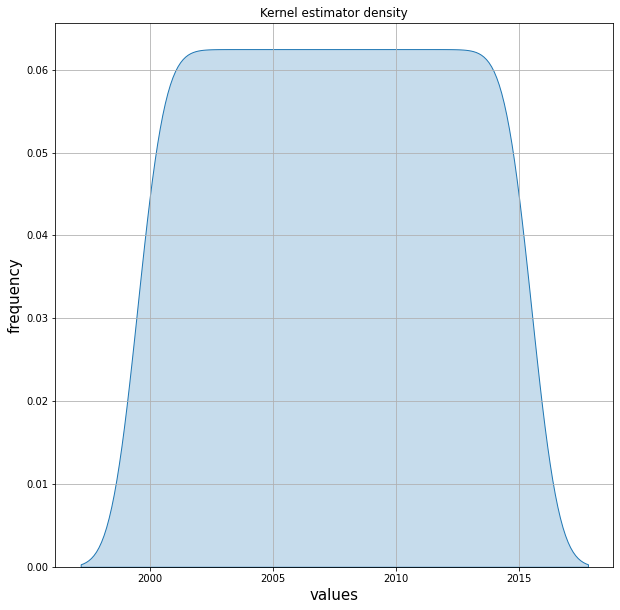

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


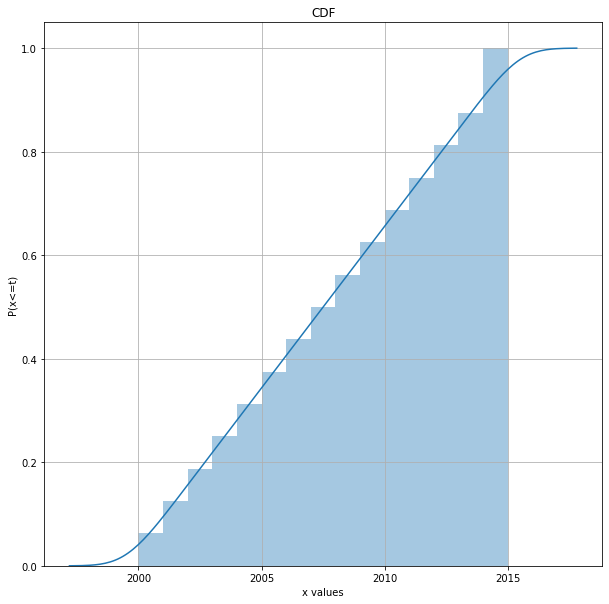

######################################################
#######################Life_expectancy_########################
######################################################


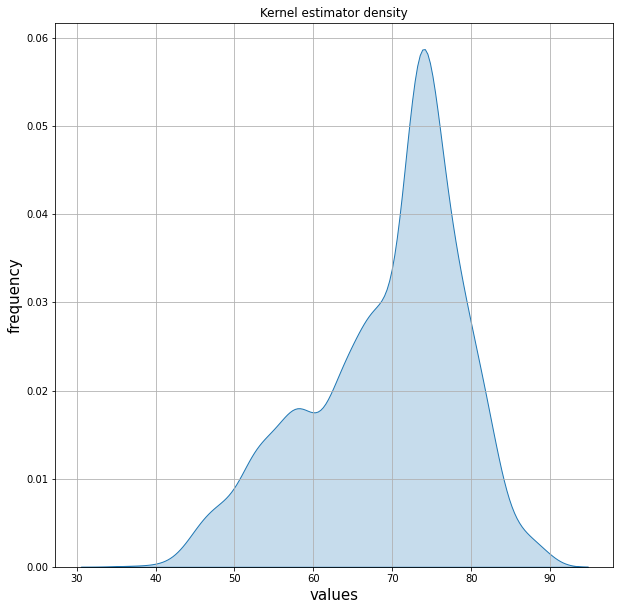

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


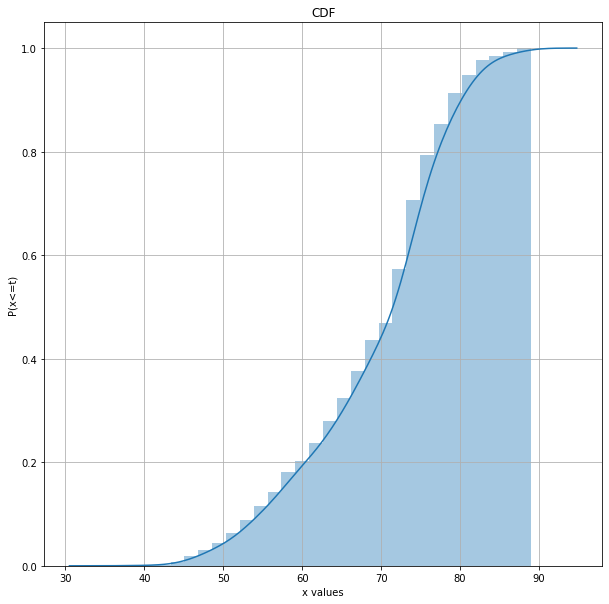

######################################################
#######################Adult_Mortality########################
######################################################


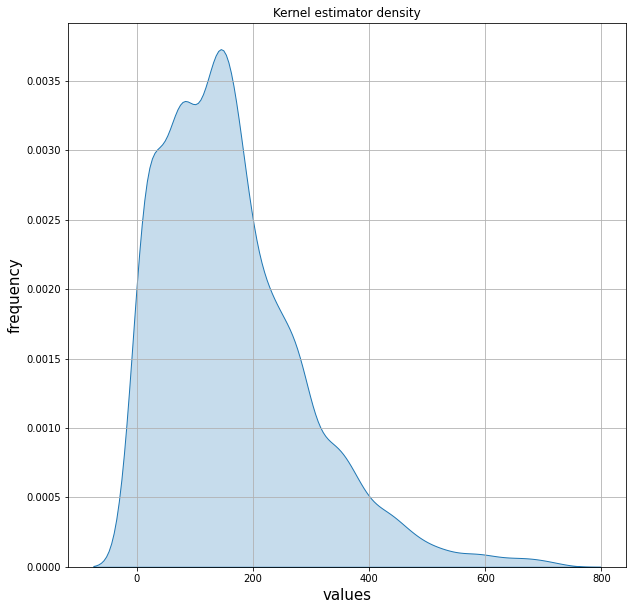

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


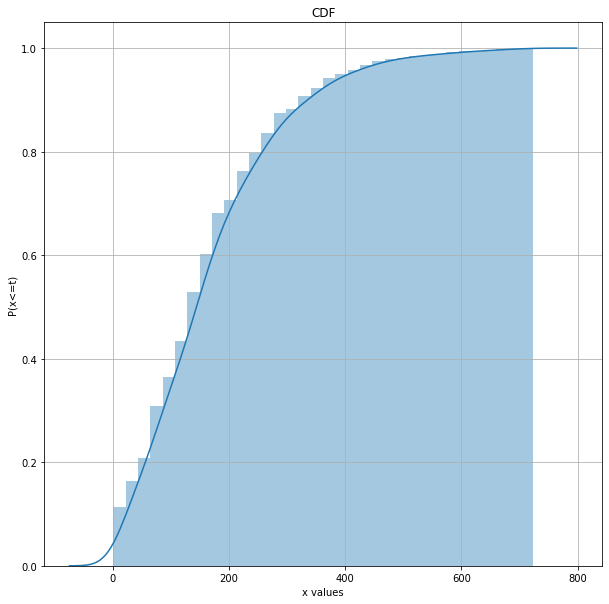

######################################################
#######################infant_deaths########################
######################################################


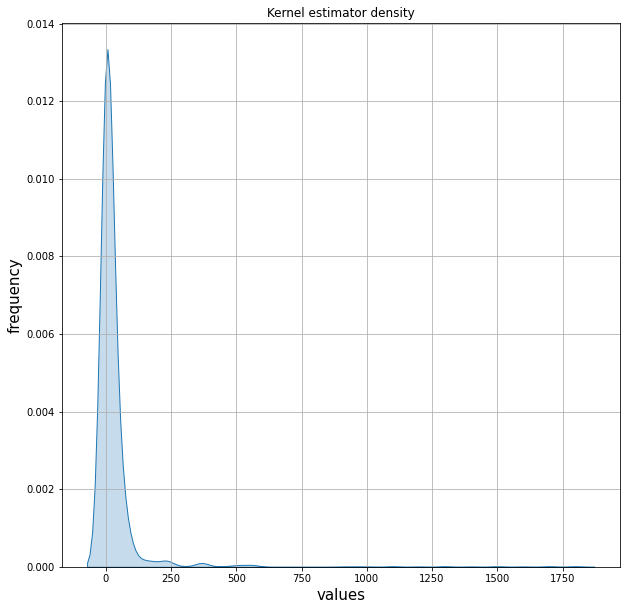

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


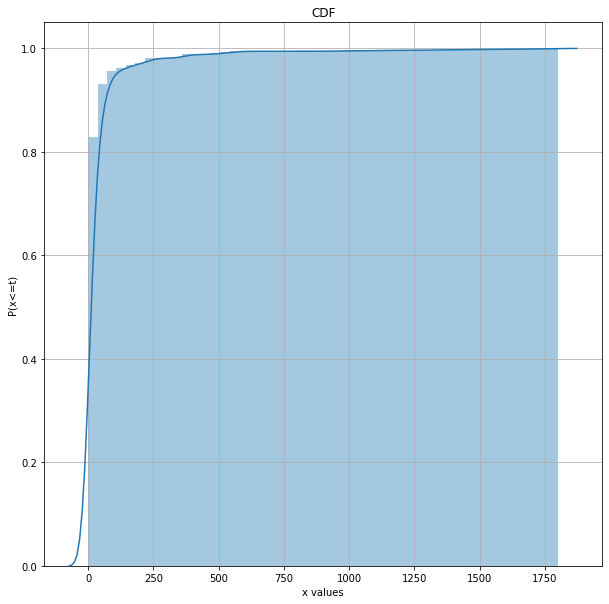

######################################################
#######################Alcohol########################
######################################################


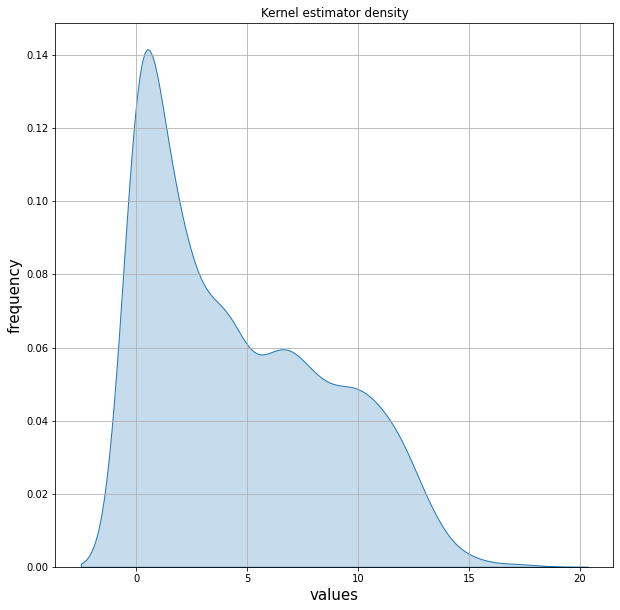

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


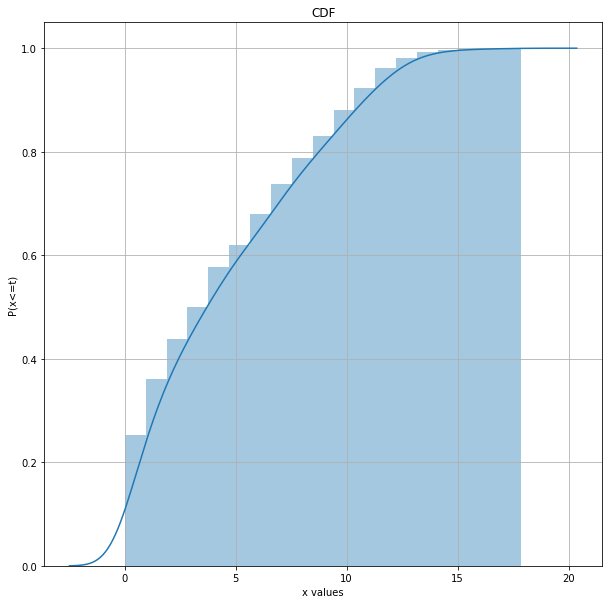

######################################################
#######################percentage_expenditure########################
######################################################


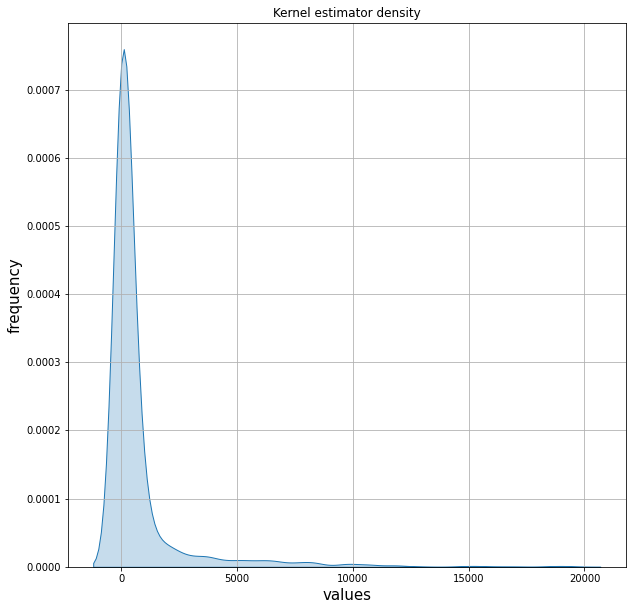

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


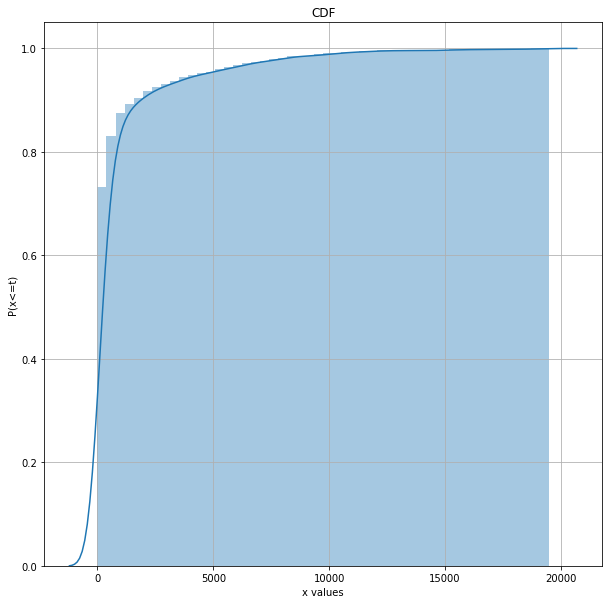

######################################################
#######################Hepatitis_B########################
######################################################


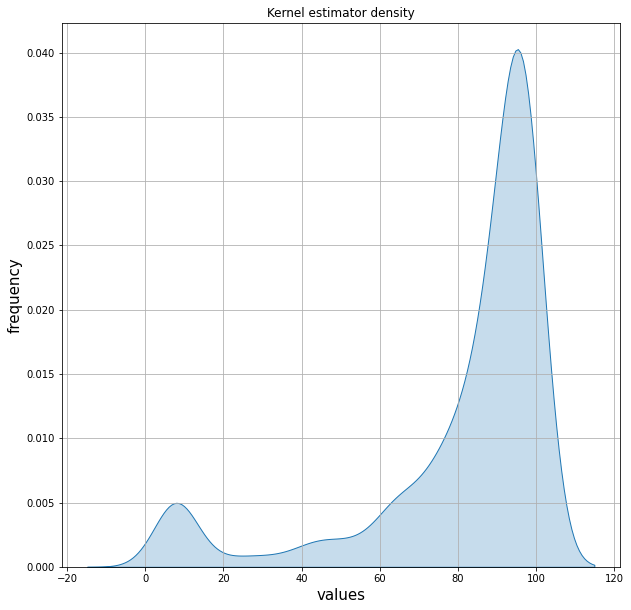

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


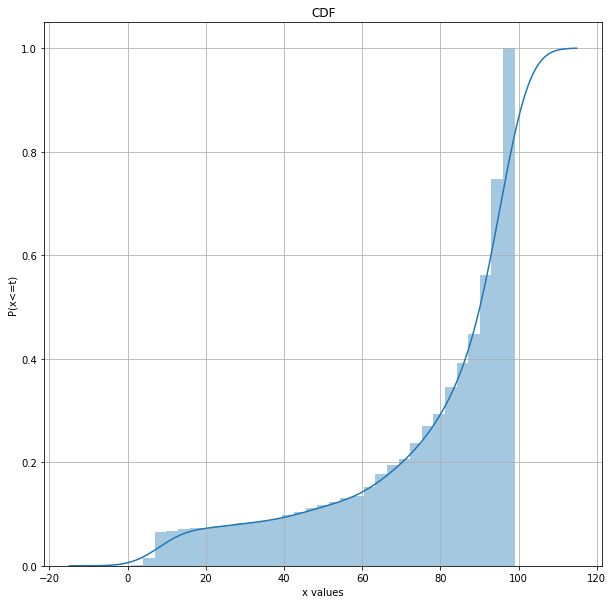

######################################################
#######################Measles_########################
######################################################


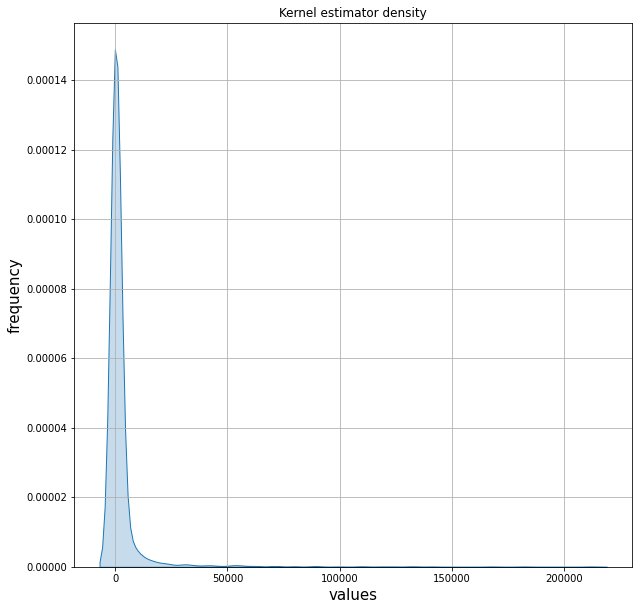

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


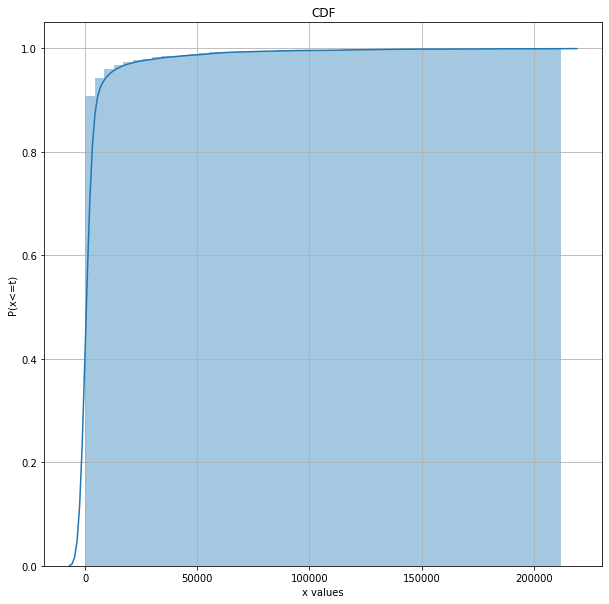

######################################################
#######################_BMI_########################
######################################################


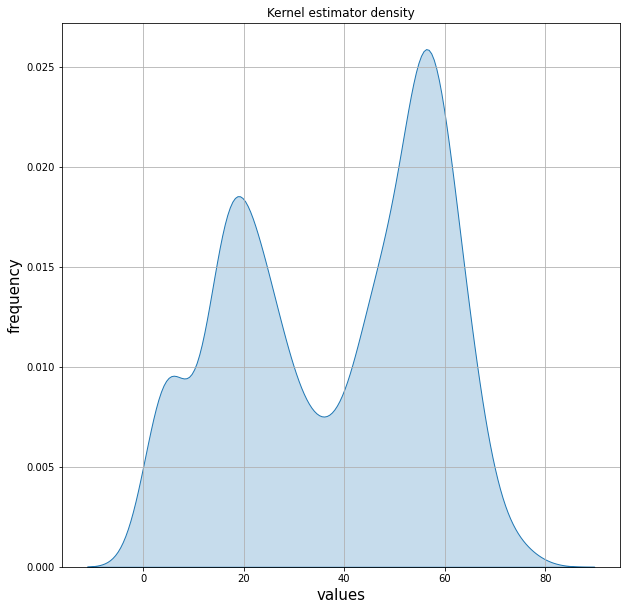

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


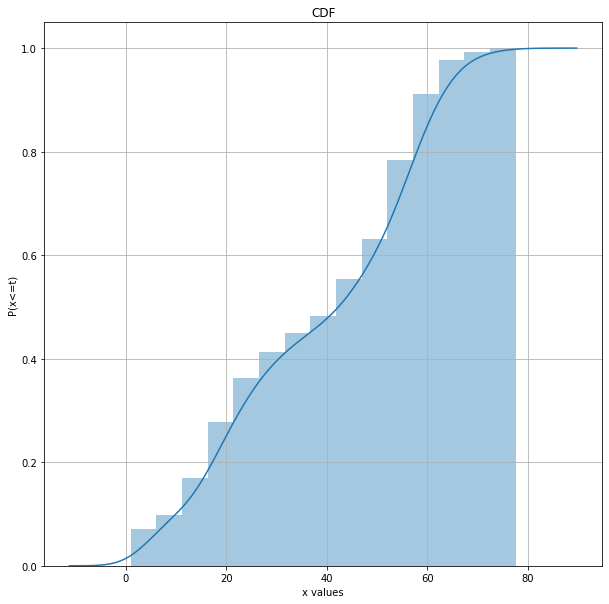

######################################################
#######################under-five_deaths_########################
######################################################


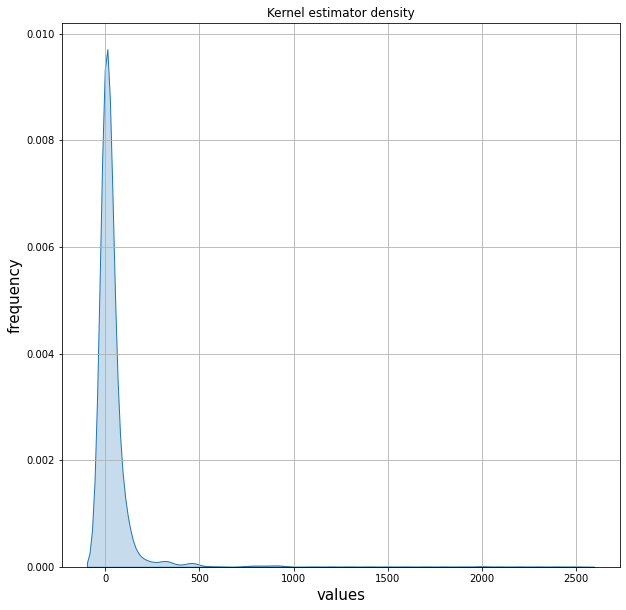

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


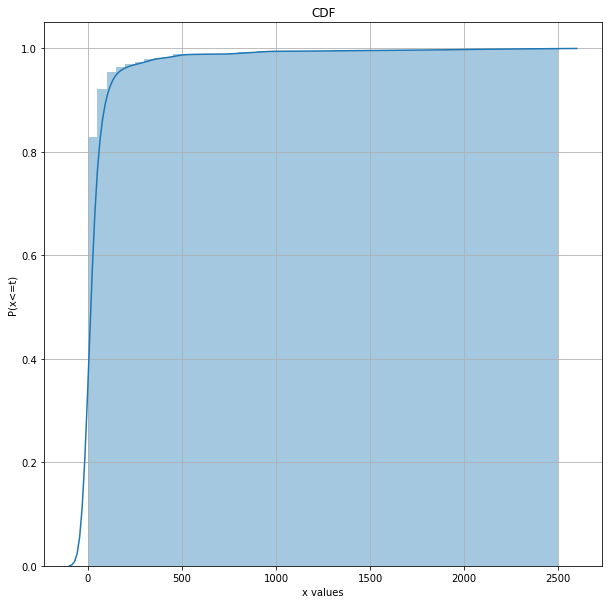

######################################################
#######################Polio########################
######################################################


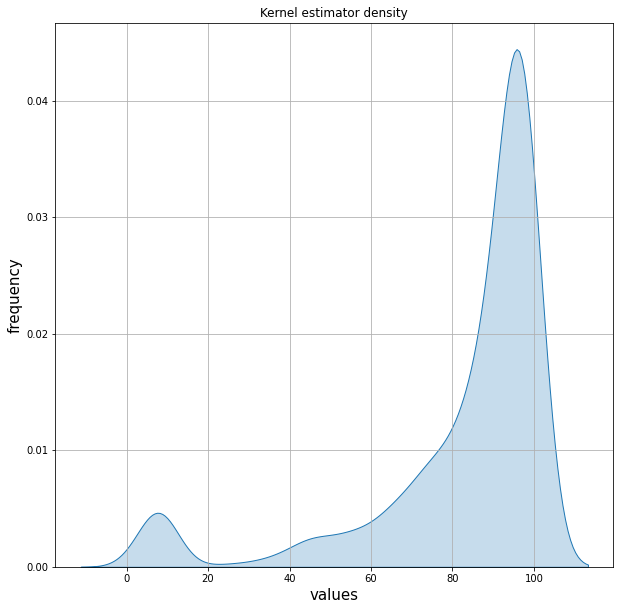

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


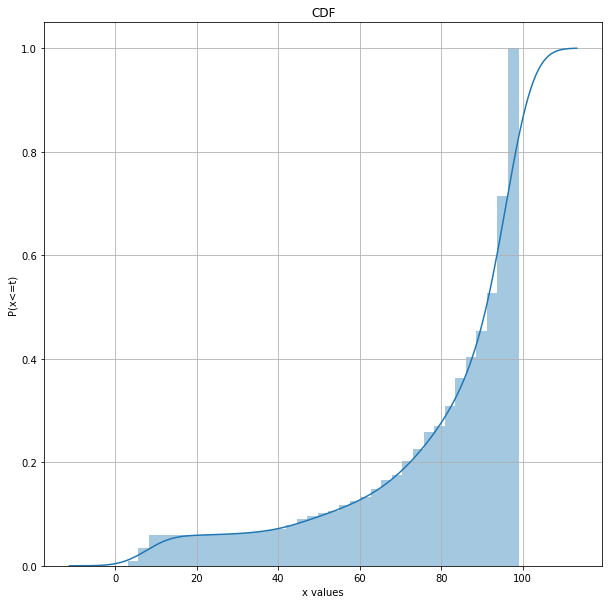

######################################################
#######################Total_expenditure########################
######################################################


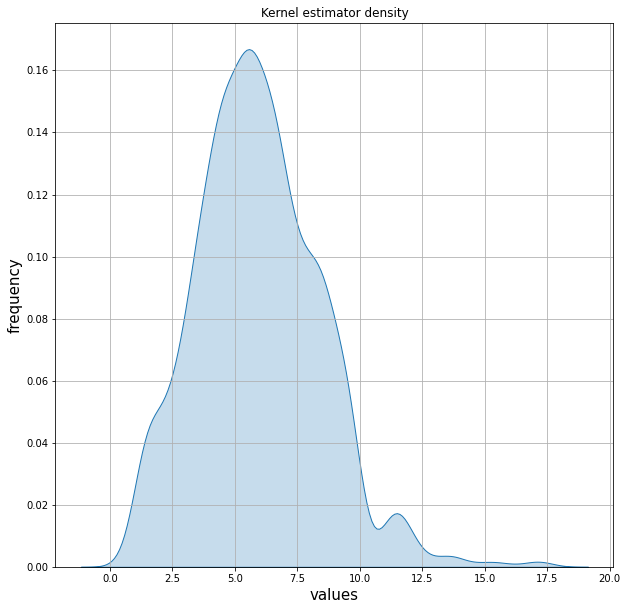

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


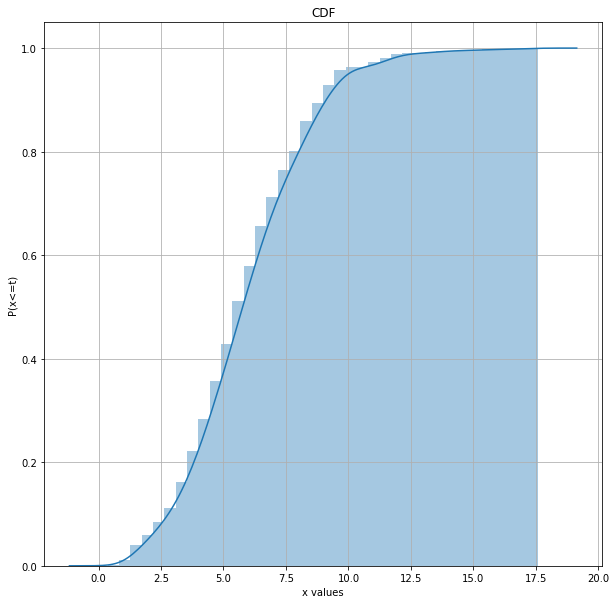

######################################################
#######################Diphtheria_########################
######################################################


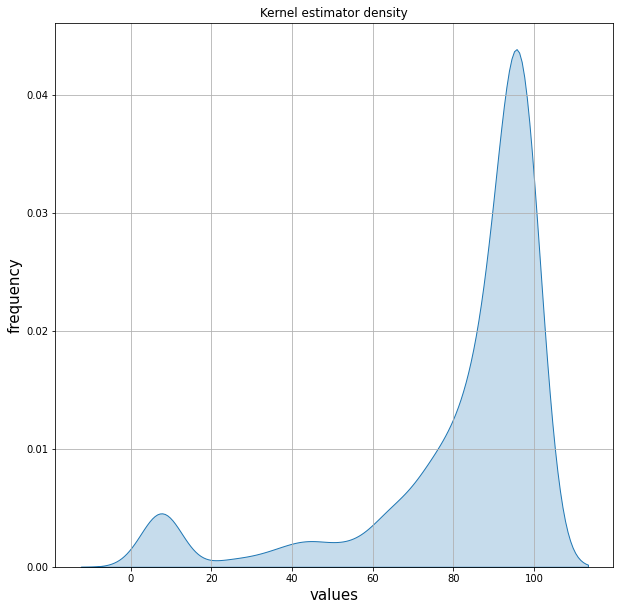

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


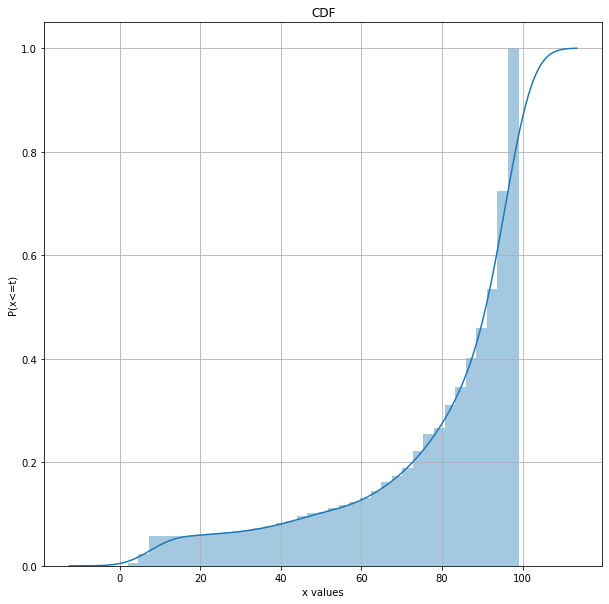

######################################################
#######################_HIV/AIDS########################
######################################################


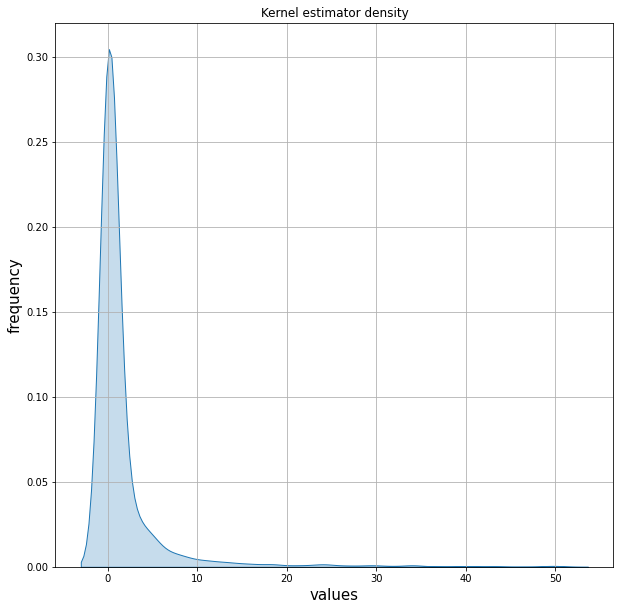

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


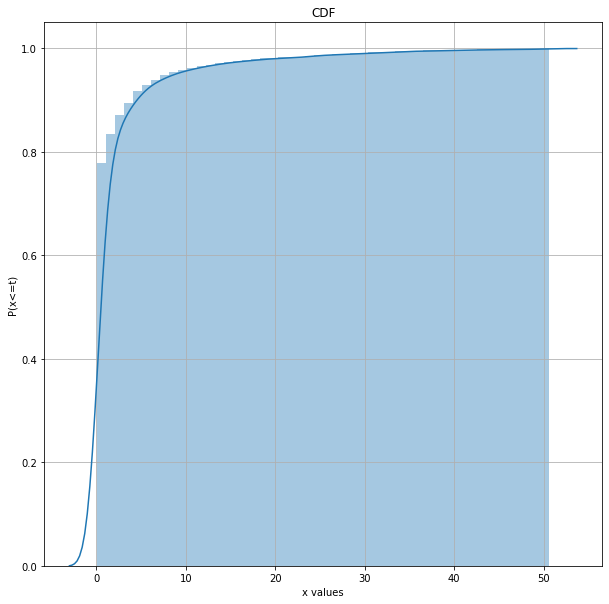

######################################################
#######################GDP########################
######################################################


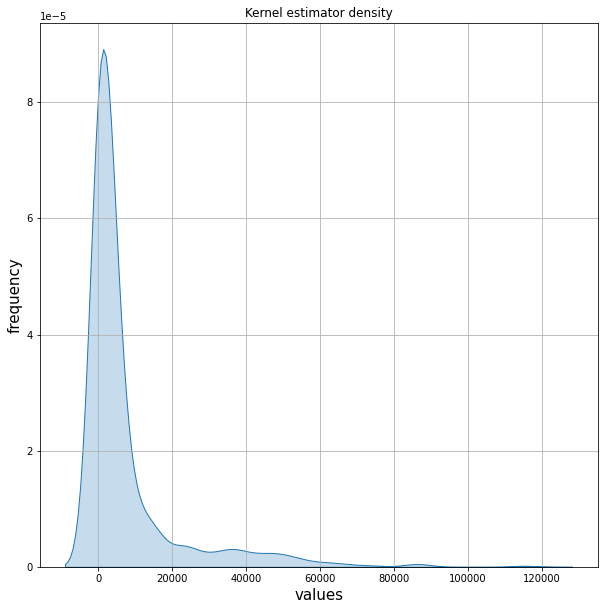

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


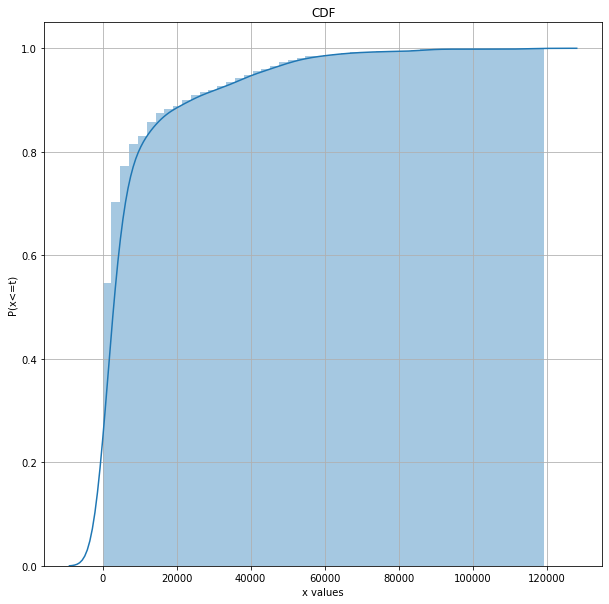

######################################################
#######################Population########################
######################################################


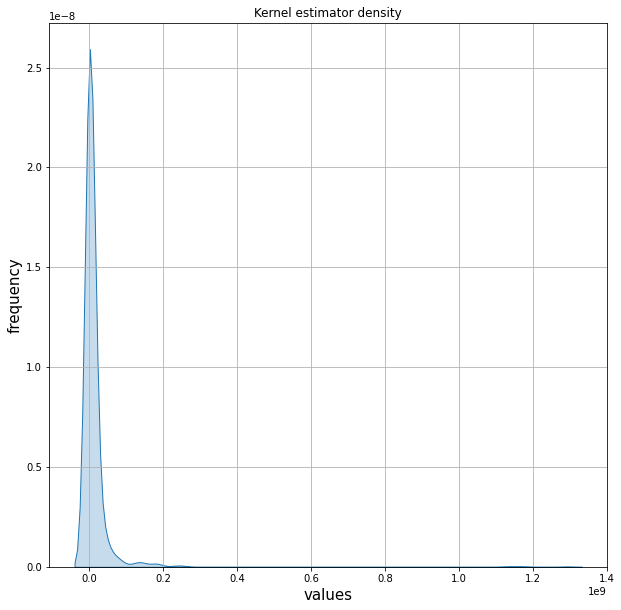

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


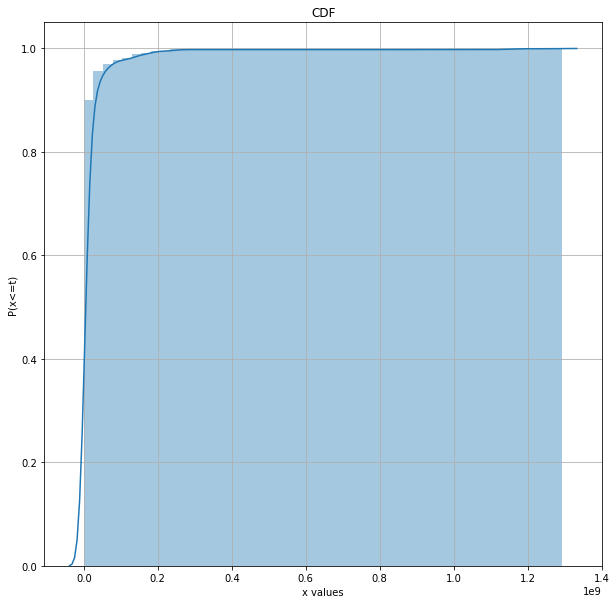

######################################################
#######################_thinness__1-19_years########################
######################################################


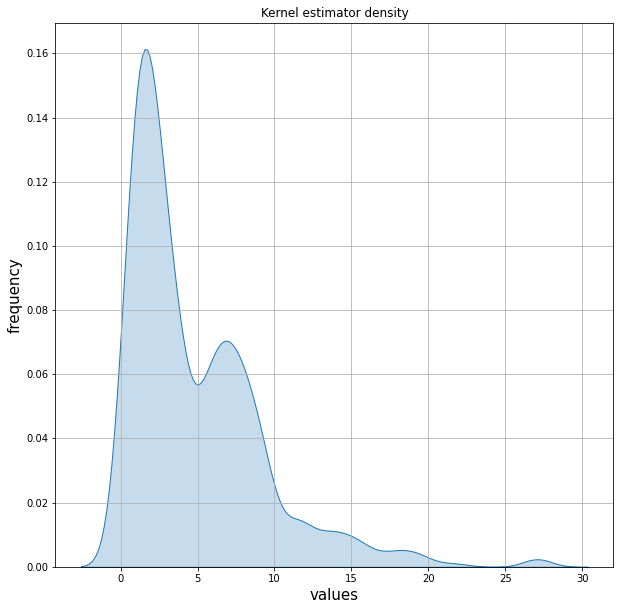

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


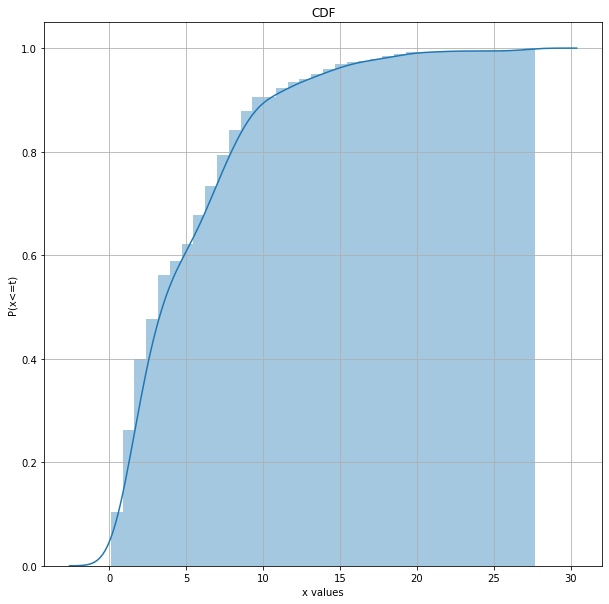

######################################################
#######################_thinness_5-9_years########################
######################################################


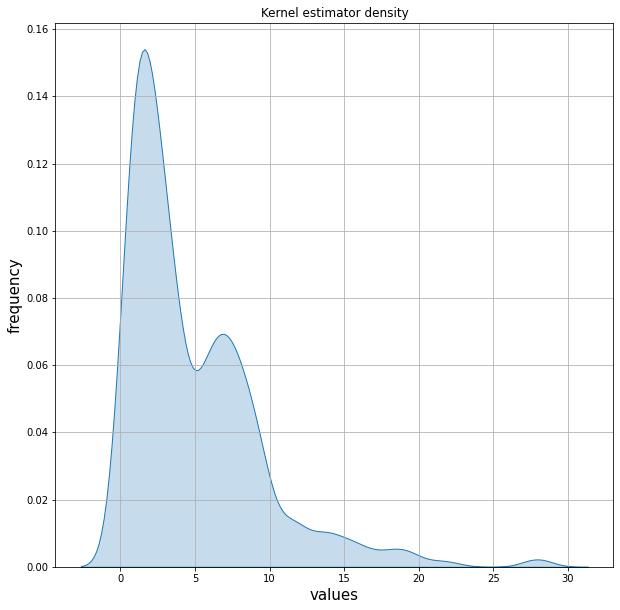

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


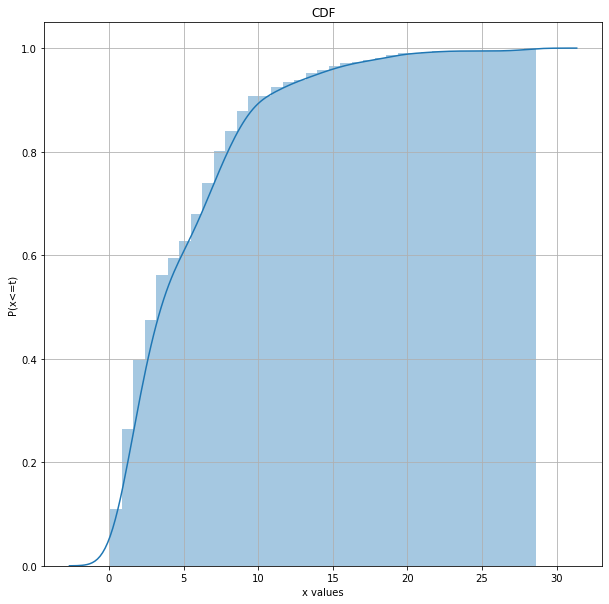

######################################################
#######################Income_composition_of_resources########################
######################################################


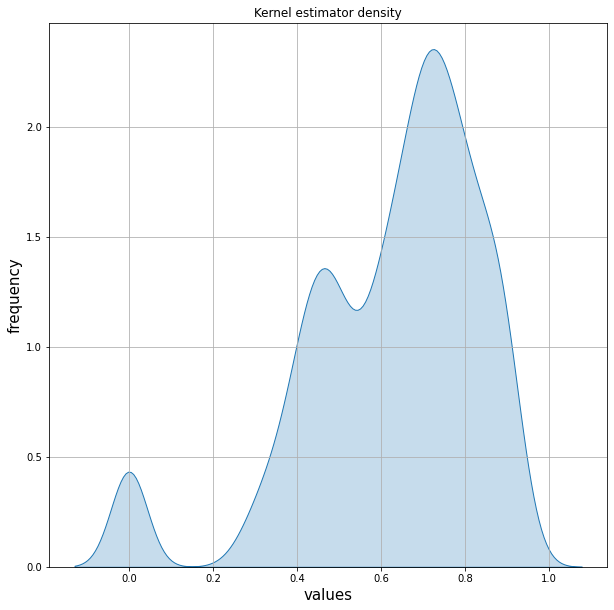

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


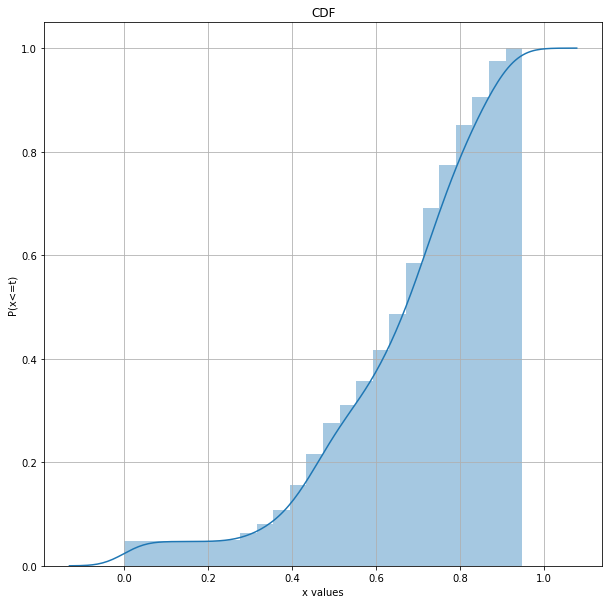

######################################################
#######################Schooling########################
######################################################


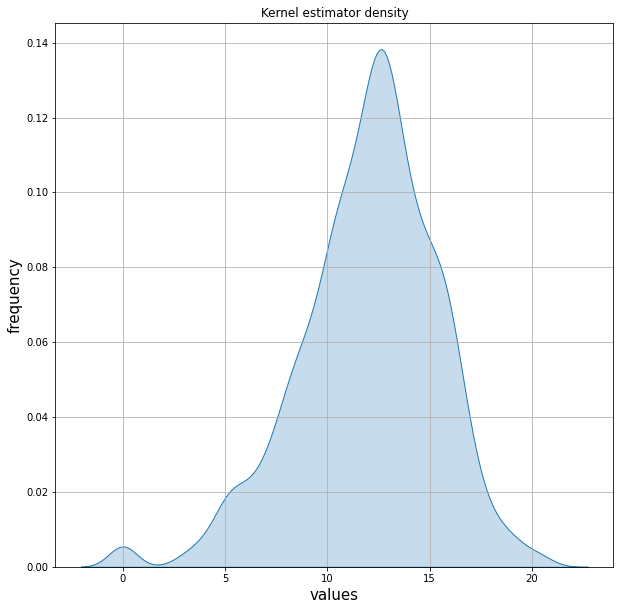

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


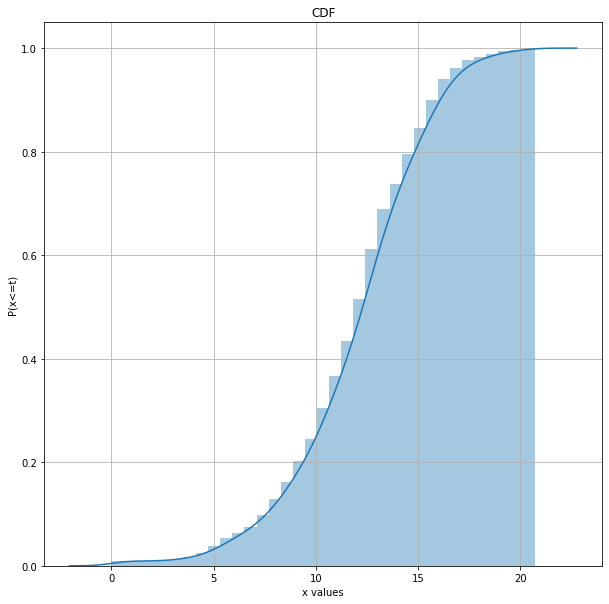

In [116]:
for key in quantitative:
  print("######################################################")
  print("#######################"+key+"########################")
  print("######################################################")
  quantitative_plotter(X[key])

In [117]:
def qualitative_plotter(x):

    # summary
    print('__________________Summary statistics__________________')
    print(x.describe())

    print('_________________plots________________')
    #df
    figsize(10,10)
    sns.displot(x)
    grid(True)
    title('Histogram')
    show()

    #cdf
    figsize(10,10)
    hist(x, cumulative = True)
    title('CDF')
    xlabel('x values')
    ylabel('P(x<=t)')
    grid(True)
    show()

######################################################
#######################Country########################
######################################################
__________________Summary statistics__________________
count           2928
unique           183
top       Mauritania
freq              16
Name: Country, dtype: object
_________________plots________________


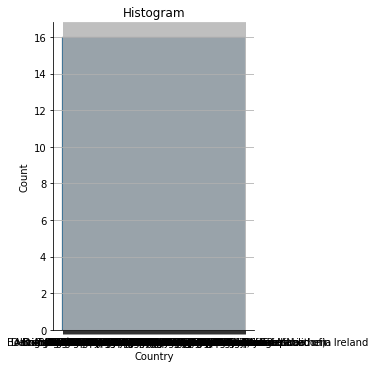

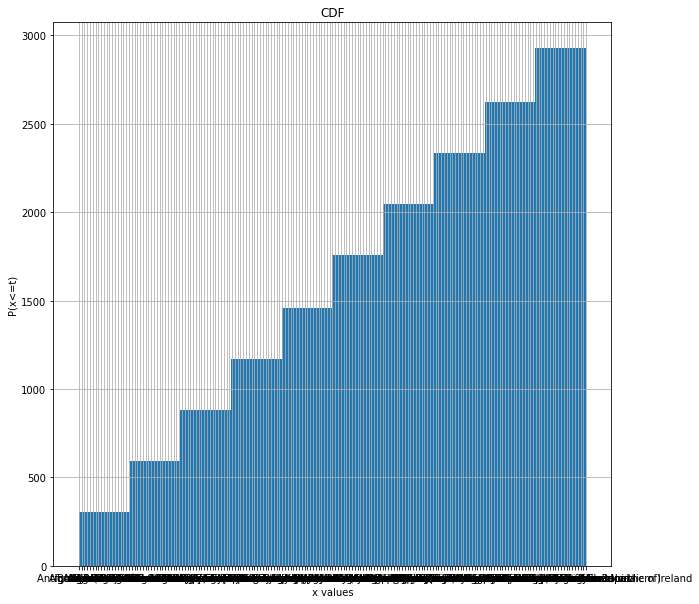

######################################################
#######################Status########################
######################################################
__________________Summary statistics__________________
count           2928
unique             2
top       Developing
freq            2416
Name: Status, dtype: object
_________________plots________________


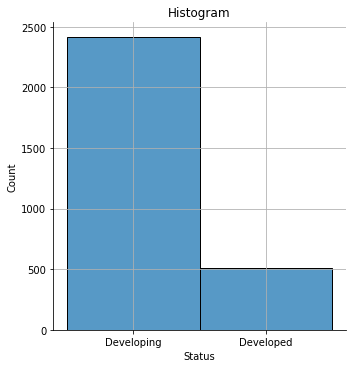

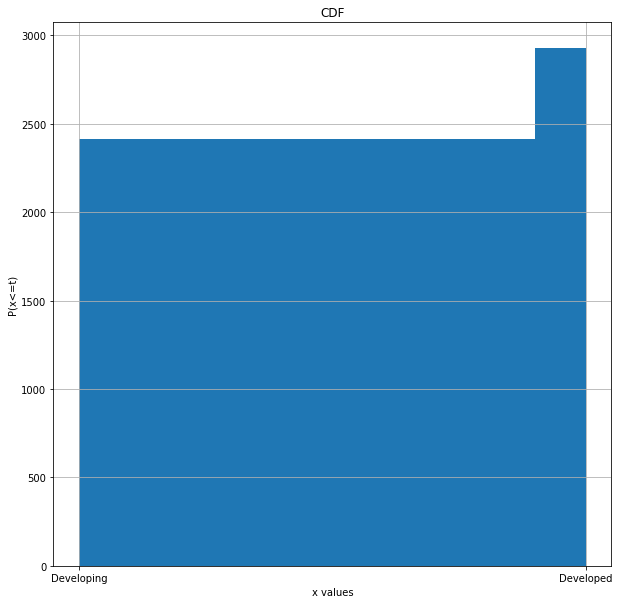

In [118]:
for key in qualitative:
  print("######################################################")
  print("#######################"+key+"########################")
  print("######################################################")
  qualitative_plotter(X[key])

# 3. Analyse bivariée

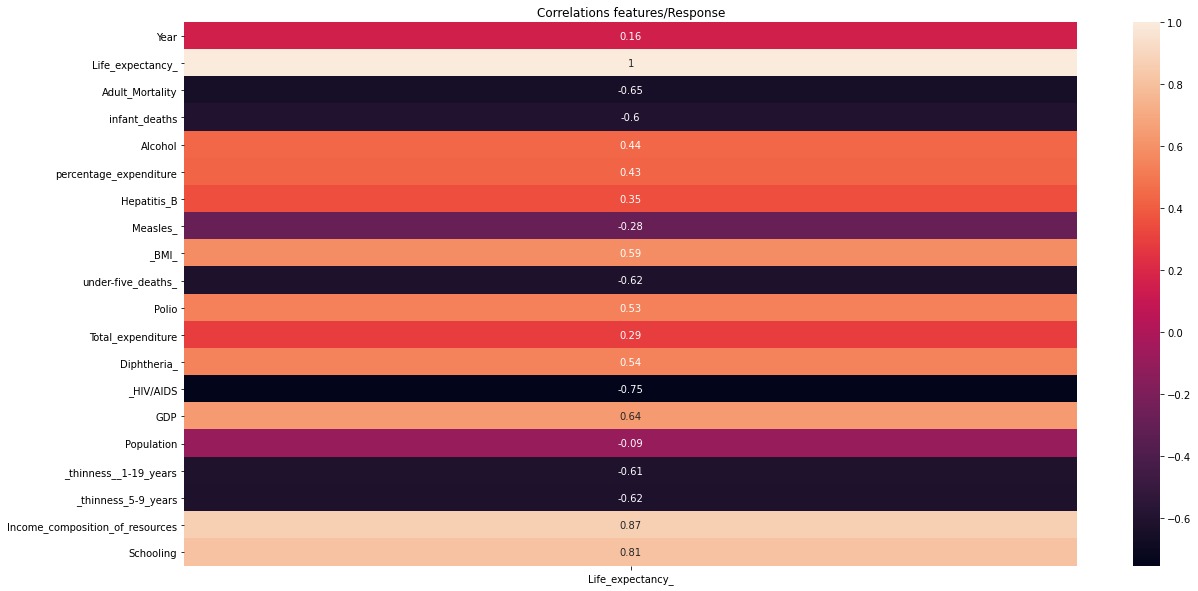

In [119]:
corrMatrix = pd.DataFrame(X.corr(method = 'spearman'))
figsize(20,10)
sns.heatmap(corrMatrix[['Life_expectancy_']], annot=True)
title('Correlations features/Response')
show()

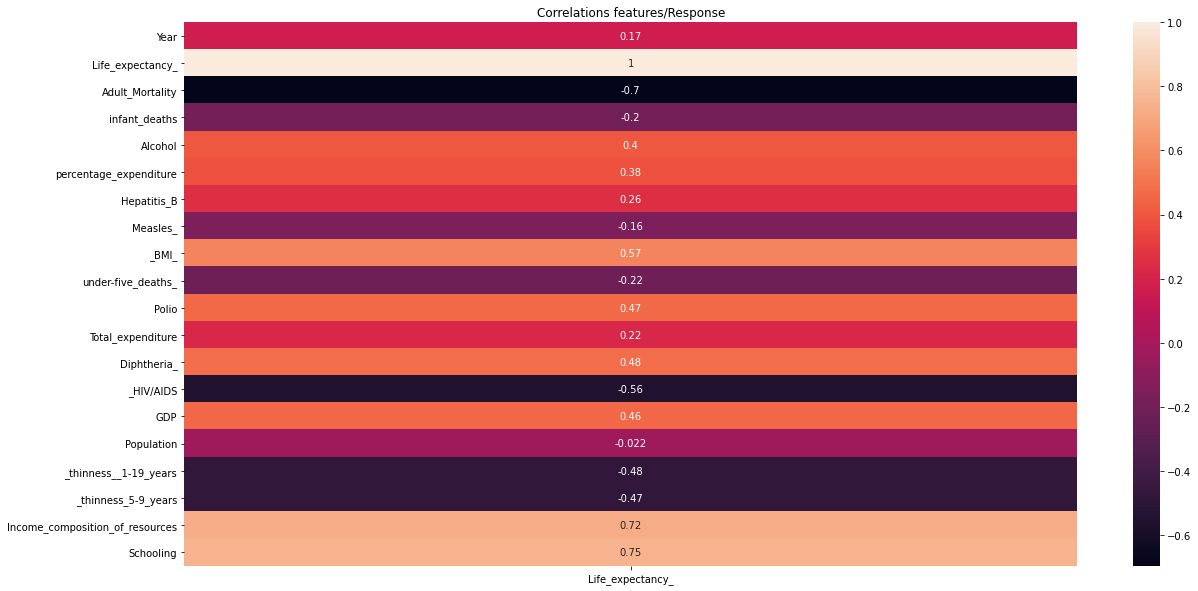

In [120]:
corrMatrix = pd.DataFrame(X.corr(method = 'pearson'))
figsize(20,10)
sns.heatmap(corrMatrix[['Life_expectancy_']], annot=True)
title('Correlations features/Response')
show()

In [121]:
quantitative = list(quantitative)
quantitative.remove('Life_expectancy_')
quantitative = array(quantitative)
y = X['Life_expectancy_']

In [122]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2923    44.3
2924    44.5
2925    44.8
2926    45.3
2927    46.0
Name: Life_expectancy_, Length: 2928, dtype: float64

In [123]:
def quantitative_vs_response(X, y, quantitative = quantitative):
    name = y.name
    
    for variable in quantitative:
      Xy = pd.DataFrame( (X[variable], y) ).transpose()

      print("#############Response vs " + variable + "##############")

      print("_______________Smooth Scatter Plot______________")
      
      figsize(10, 10)
      ax = sns.displot(Xy, 
                  x = variable, 
                  y = name)
      show()

      print("_______________Smooth joint Distribution______________")
      figsize(10, 10)
      sns.kdeplot(data = Xy, 
                  x = variable, 
                  y = name, 
                  fill=True, 
                  thresh=0, 
                  levels=100, 
                  cmap="mako")
      show()

In [124]:

def qualitative_vs_response(X, y, qualitative = qualitative):
  name = y.name

  for variable in qualitative: 
    
    Xy = pd.DataFrame( (X[variable], y) ).transpose()

    print("#############Response vs " + variable + "##############")

    print("_____________Pivot_______________")
    figsize = (10, 10)
    # Plot the orbital period with horizontal boxes
    sns.boxplot(x = name, 
                y = variable, 
                data=Xy,
                whis=[0, 100], 
                width=.6, 
                palette="vlag")

    # Add in points to show each observation
    sns.stripplot(x = name, 
                  y = variable, 
                  data=Xy,
                  size=4, 
                  color=".3", 
                  linewidth=0)
    show()

    print("______________Conditionnal Distribution_______________")
    figsize = (10, 10)
    try : 
      Xy[variable] = Label_Encoder().fit_transform(Xy[variable])
      sns.displot(x = name, hue = variable, data = Xy, kde = True, fill = True)
      show()
    except : 
      sns.displot(Xy, x = name, hue = variable, fill = True)
      show()

In [125]:
def get_multivariate_analysis(X, y):

  print("################################################")
  print("#########Quantitative vs quantitative###########")
  print("################################################")

  quantitative_vs_response(X, y)

  print('')
  print('')

  print("################################################")
  print("#########Quantitative vs qualitative############")
  print("################################################")

  qualitative_vs_response(X, y)

################################################
#########Quantitative vs quantitative###########
################################################
#############Response vs Year##############
_______________Smooth Scatter Plot______________


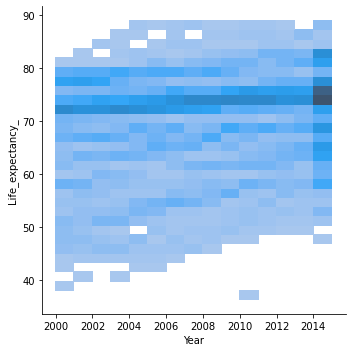

_______________Smooth joint Distribution______________


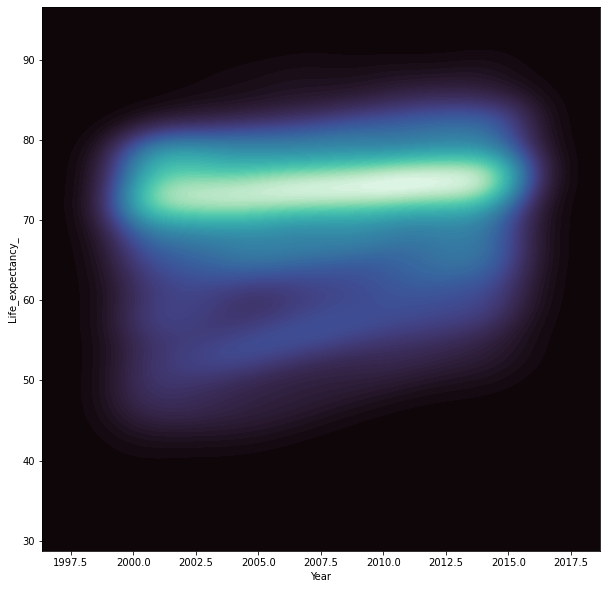

#############Response vs Adult_Mortality##############
_______________Smooth Scatter Plot______________


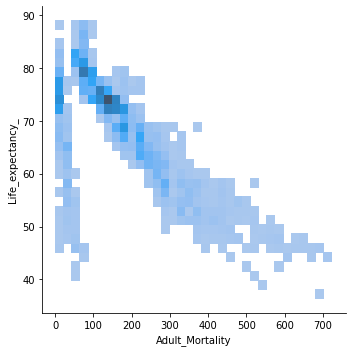

_______________Smooth joint Distribution______________


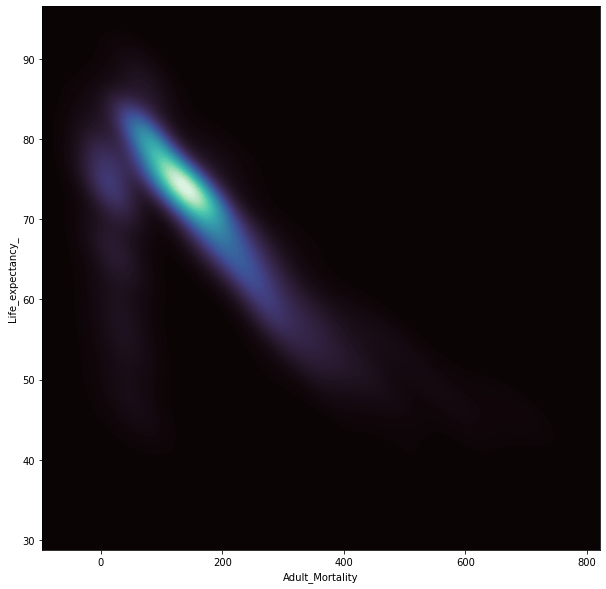

#############Response vs infant_deaths##############
_______________Smooth Scatter Plot______________


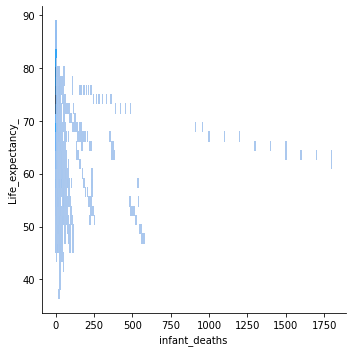

_______________Smooth joint Distribution______________


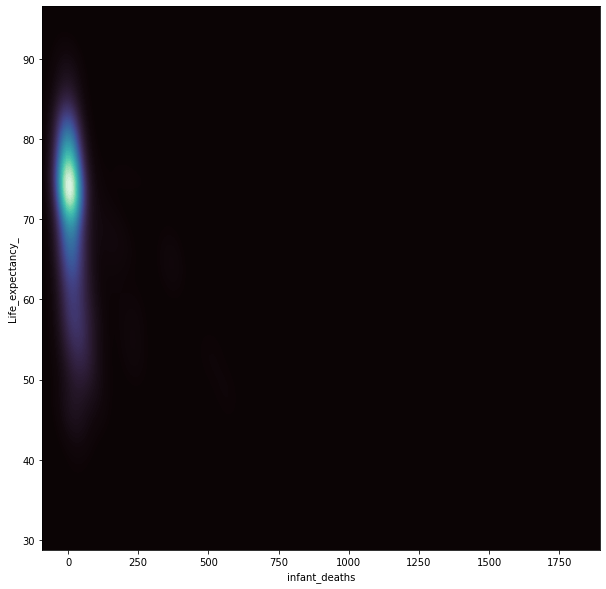

#############Response vs Alcohol##############
_______________Smooth Scatter Plot______________


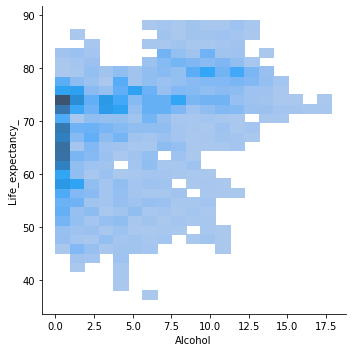

_______________Smooth joint Distribution______________


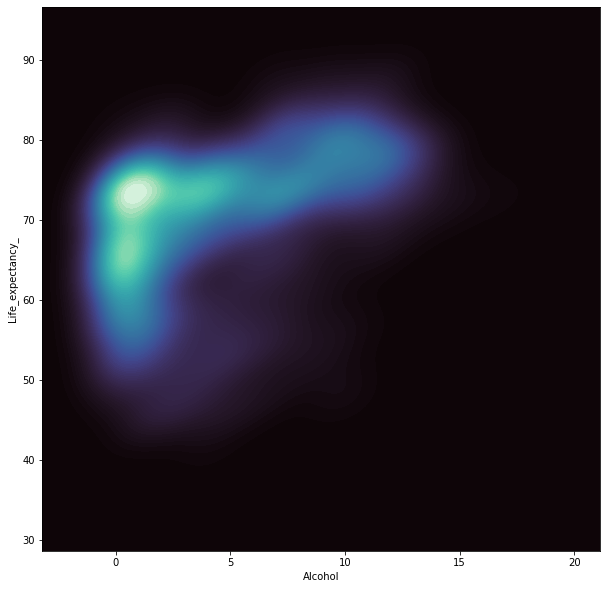

#############Response vs percentage_expenditure##############
_______________Smooth Scatter Plot______________


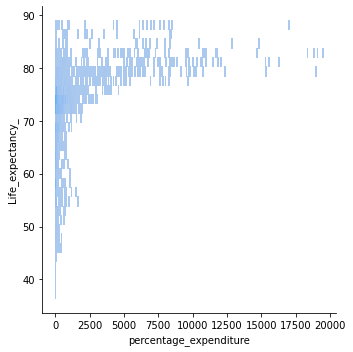

_______________Smooth joint Distribution______________


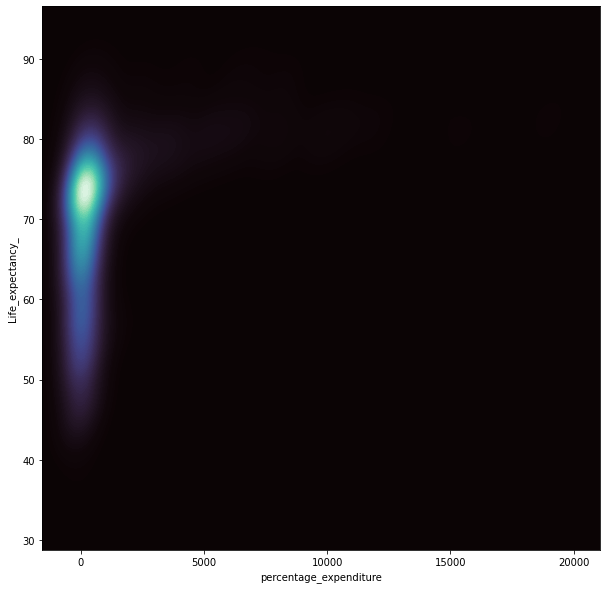

#############Response vs Hepatitis_B##############
_______________Smooth Scatter Plot______________


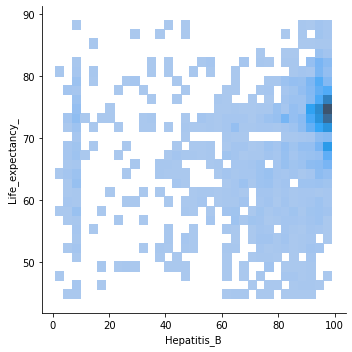

_______________Smooth joint Distribution______________


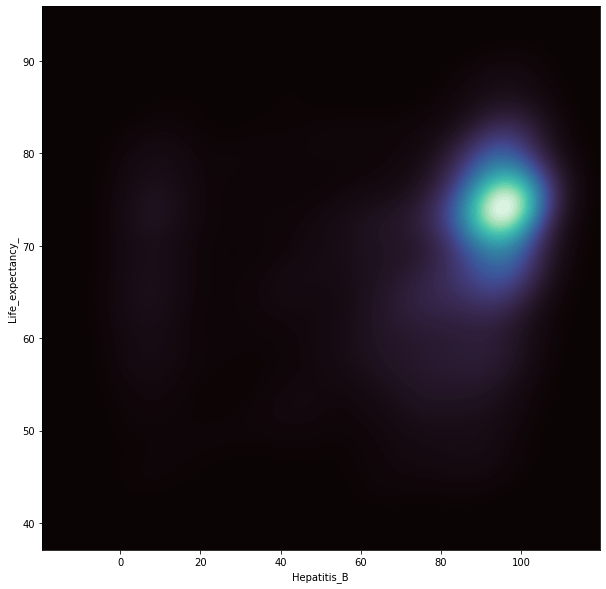

#############Response vs Measles_##############
_______________Smooth Scatter Plot______________


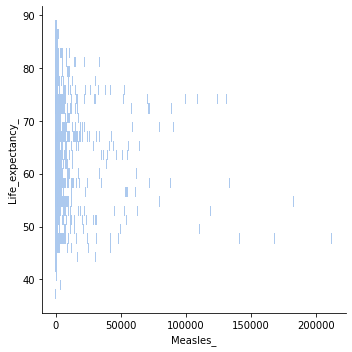

_______________Smooth joint Distribution______________


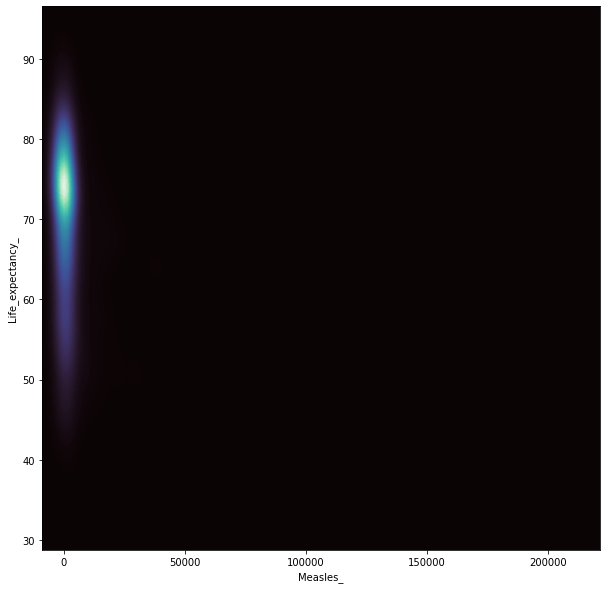

#############Response vs _BMI_##############
_______________Smooth Scatter Plot______________


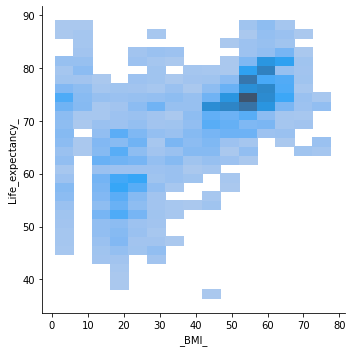

_______________Smooth joint Distribution______________


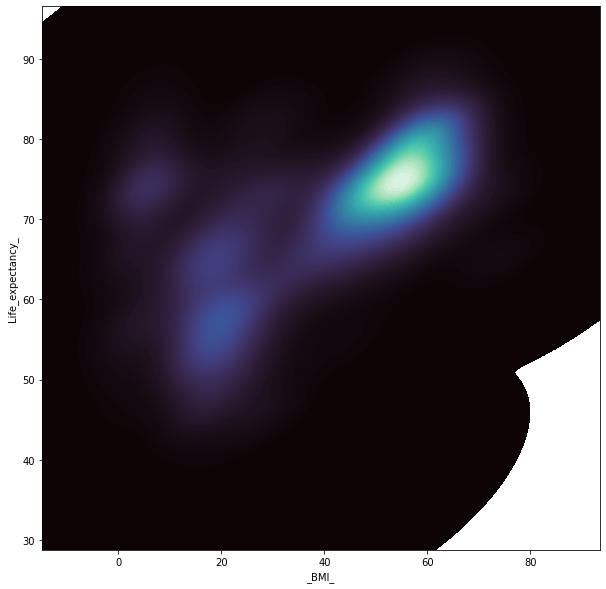

#############Response vs under-five_deaths_##############
_______________Smooth Scatter Plot______________


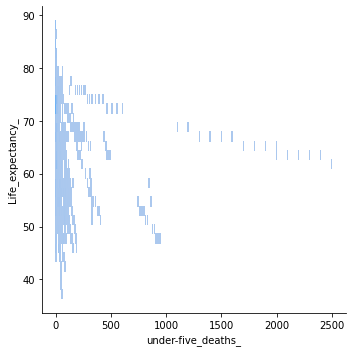

_______________Smooth joint Distribution______________


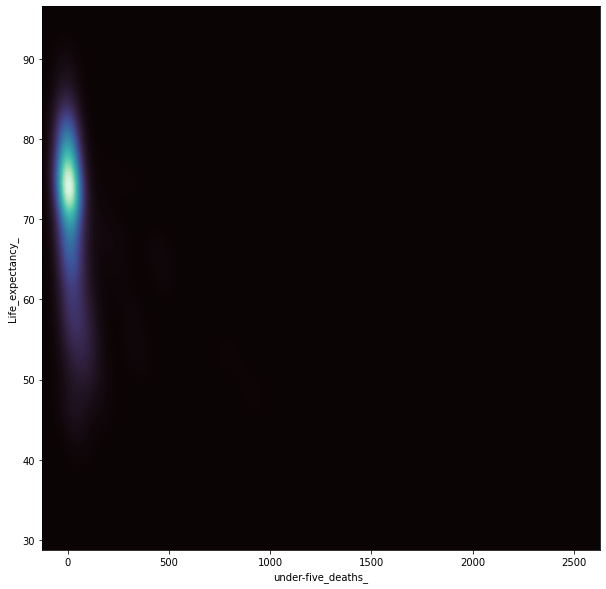

#############Response vs Polio##############
_______________Smooth Scatter Plot______________


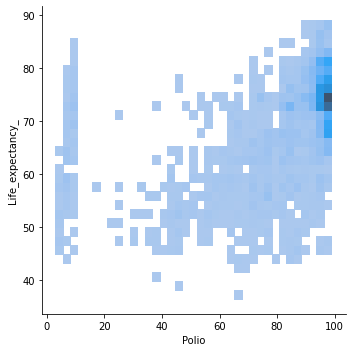

_______________Smooth joint Distribution______________


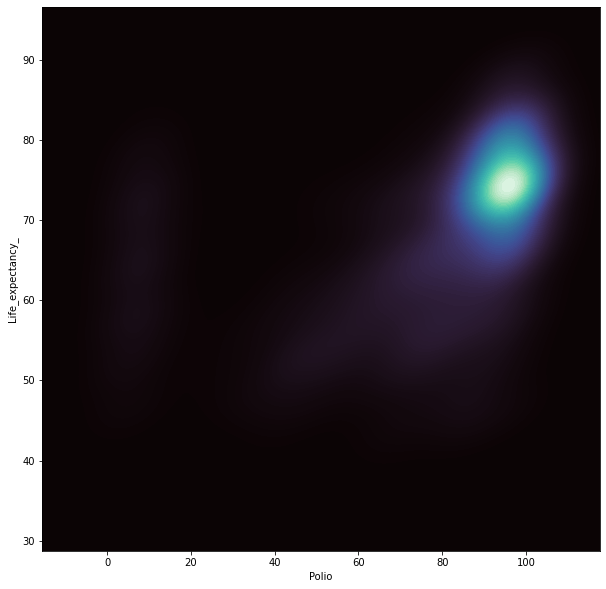

#############Response vs Total_expenditure##############
_______________Smooth Scatter Plot______________


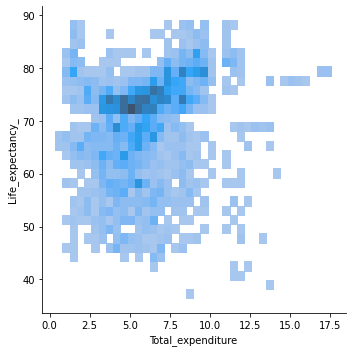

_______________Smooth joint Distribution______________


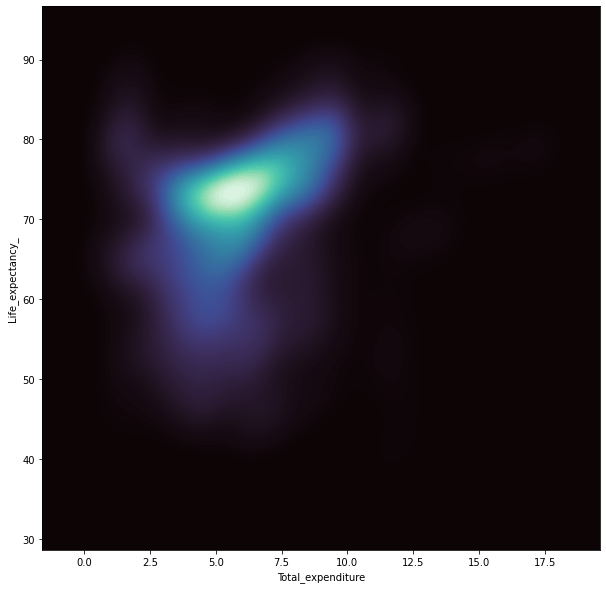

#############Response vs Diphtheria_##############
_______________Smooth Scatter Plot______________


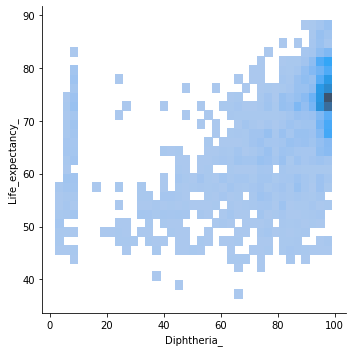

_______________Smooth joint Distribution______________


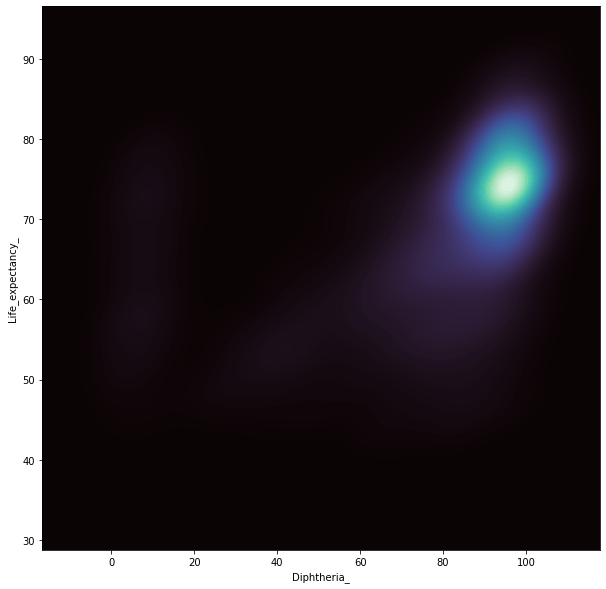

#############Response vs _HIV/AIDS##############
_______________Smooth Scatter Plot______________


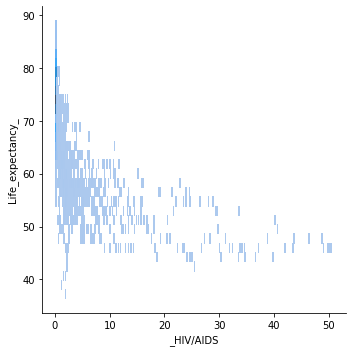

_______________Smooth joint Distribution______________


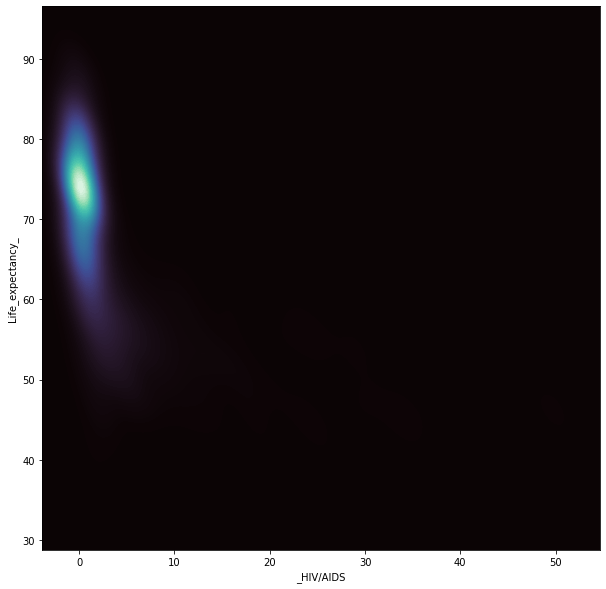

#############Response vs GDP##############
_______________Smooth Scatter Plot______________


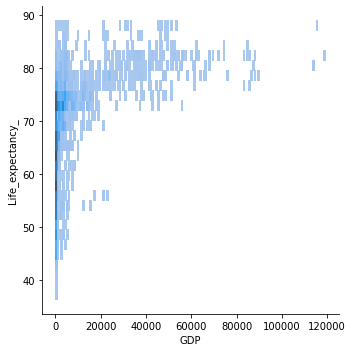

_______________Smooth joint Distribution______________


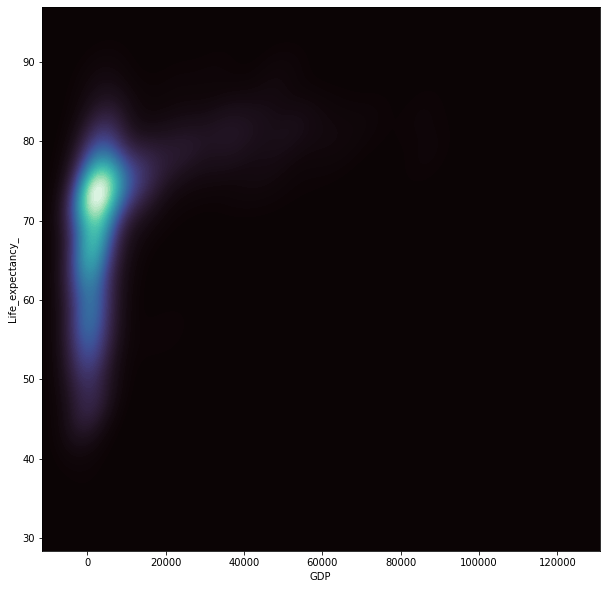

#############Response vs Population##############
_______________Smooth Scatter Plot______________


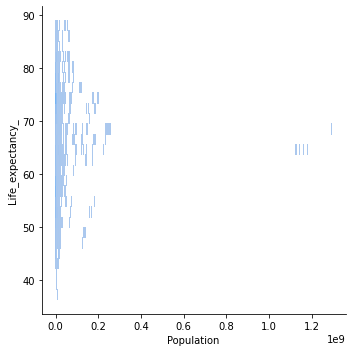

_______________Smooth joint Distribution______________


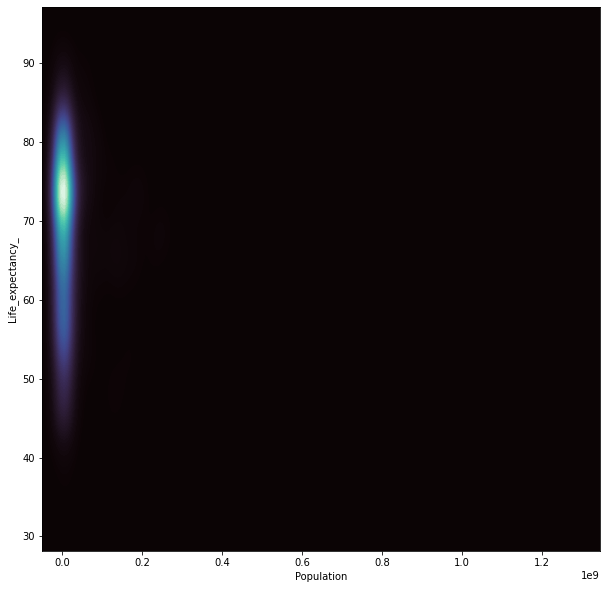

#############Response vs _thinness__1-19_years##############
_______________Smooth Scatter Plot______________


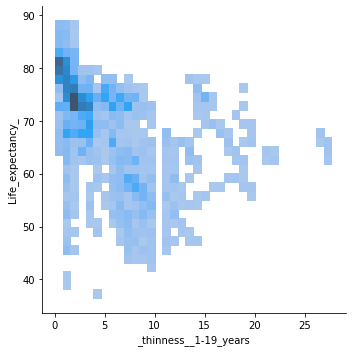

_______________Smooth joint Distribution______________


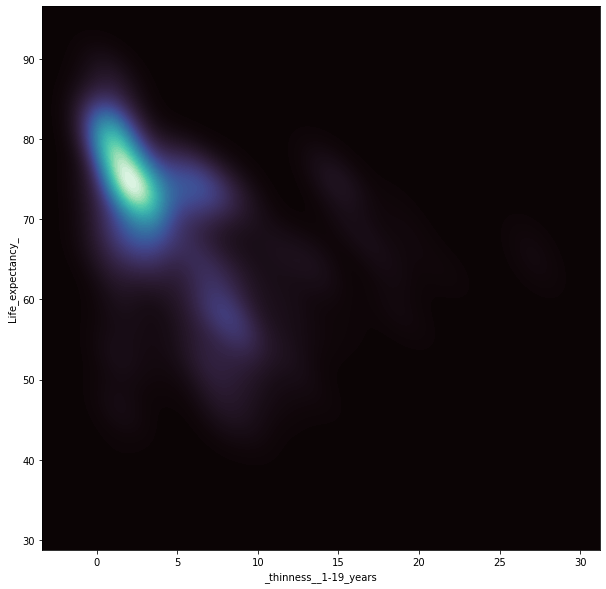

#############Response vs _thinness_5-9_years##############
_______________Smooth Scatter Plot______________


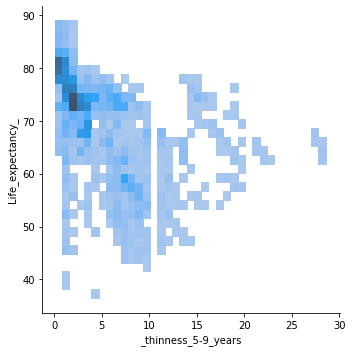

_______________Smooth joint Distribution______________


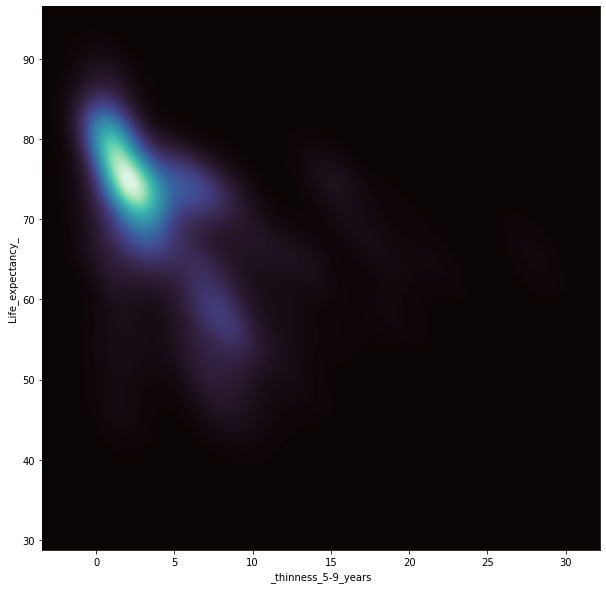

#############Response vs Income_composition_of_resources##############
_______________Smooth Scatter Plot______________


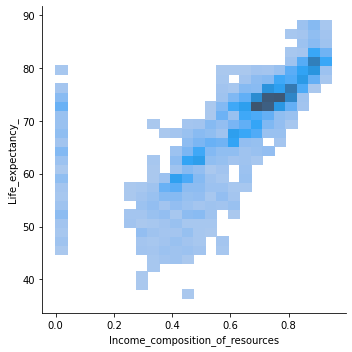

_______________Smooth joint Distribution______________


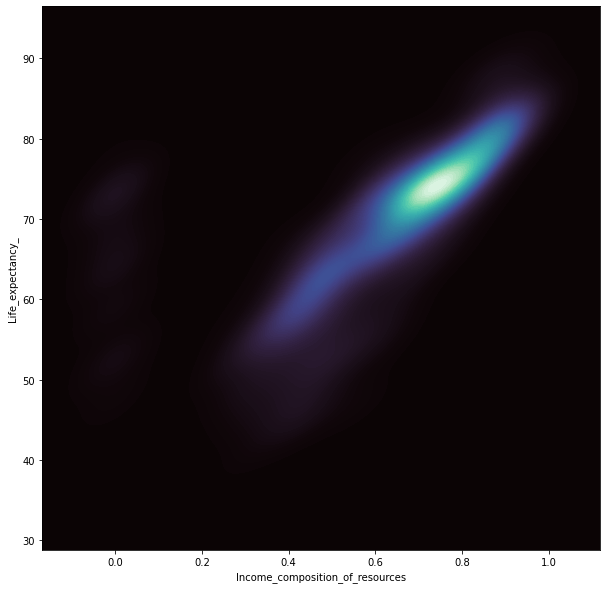

#############Response vs Schooling##############
_______________Smooth Scatter Plot______________


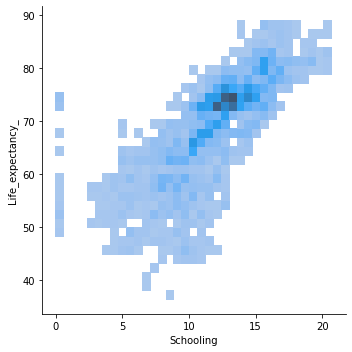

_______________Smooth joint Distribution______________


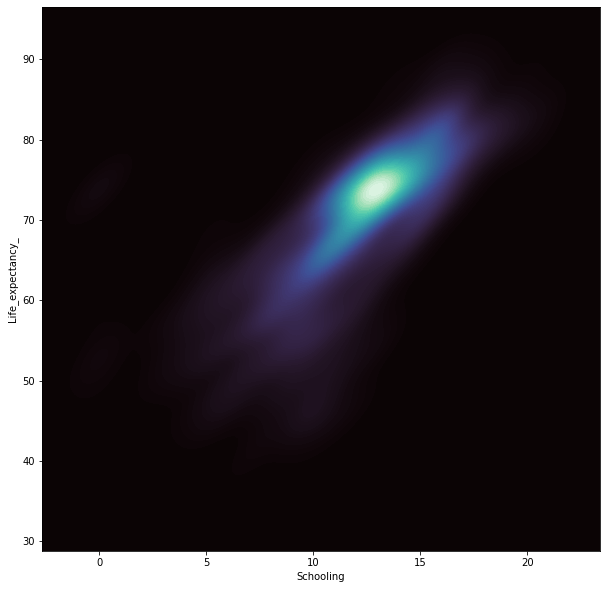



################################################
#########Quantitative vs qualitative############
################################################
#############Response vs Country##############
_____________Pivot_______________


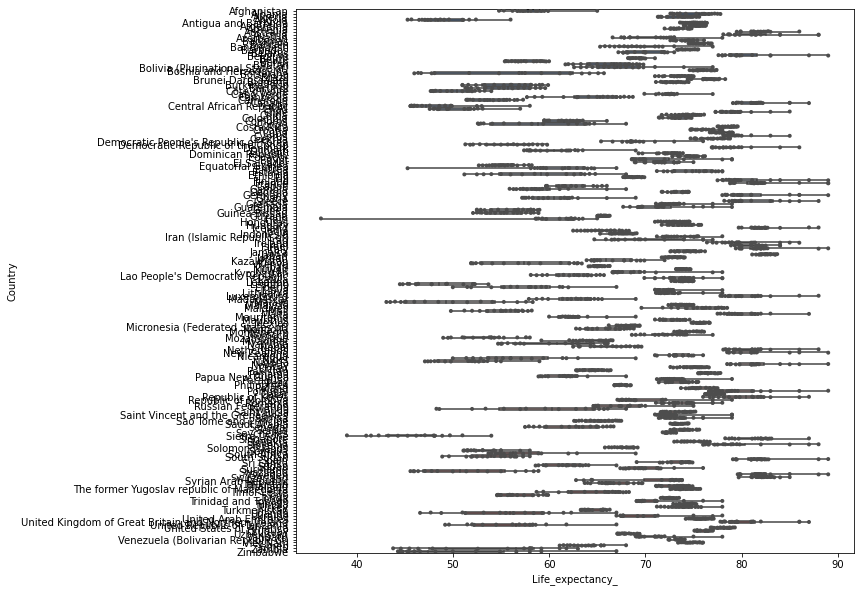

______________Conditionnal Distribution_______________


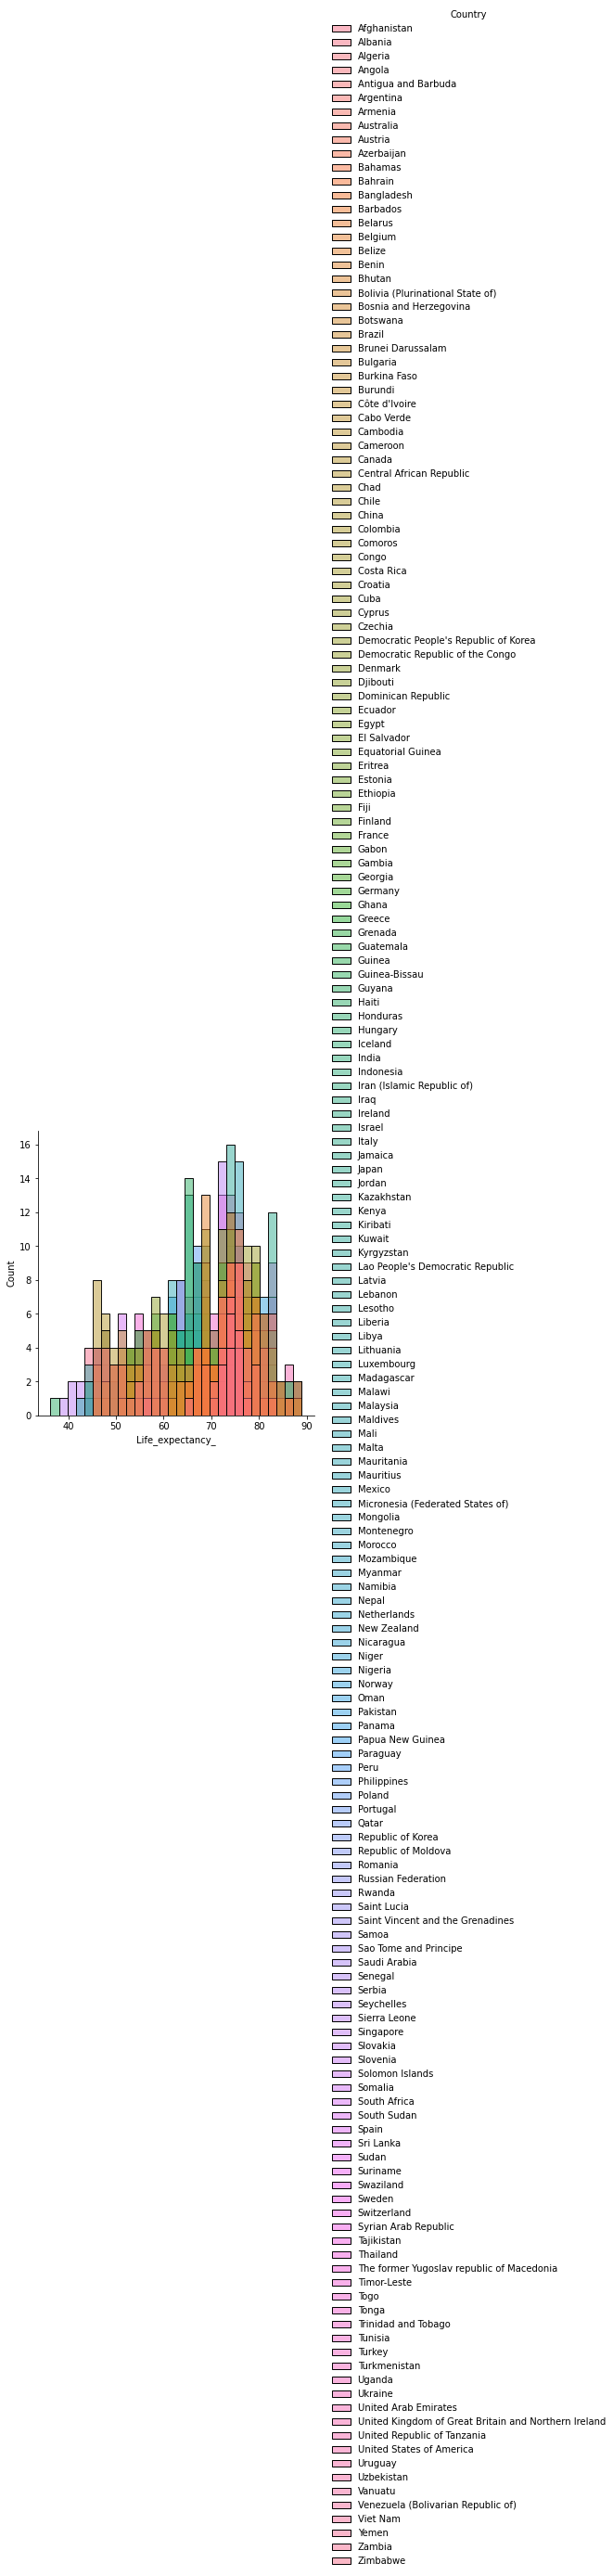

#############Response vs Status##############
_____________Pivot_______________


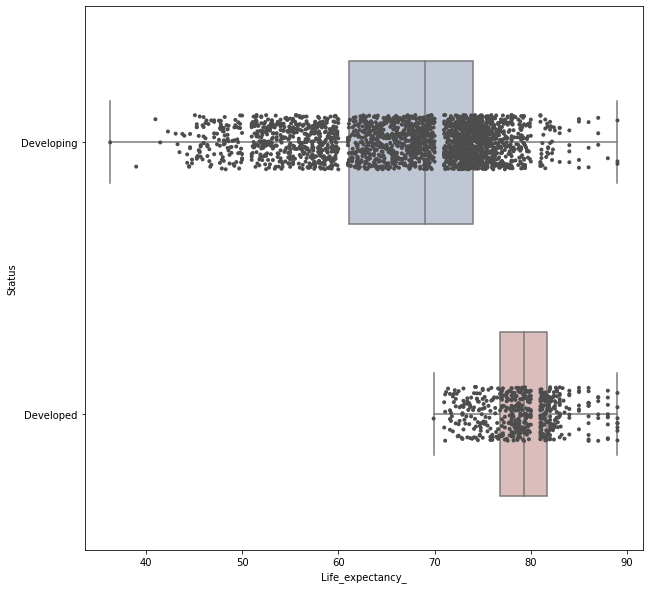

______________Conditionnal Distribution_______________


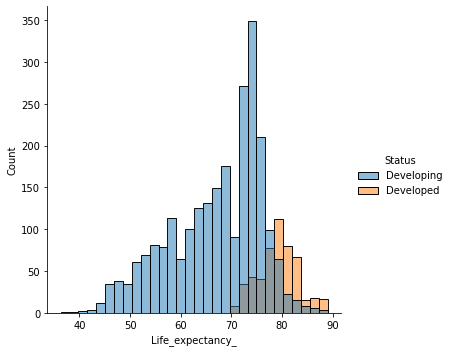

In [126]:
get_multivariate_analysis(X, y)

# 4. Preprocessing

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

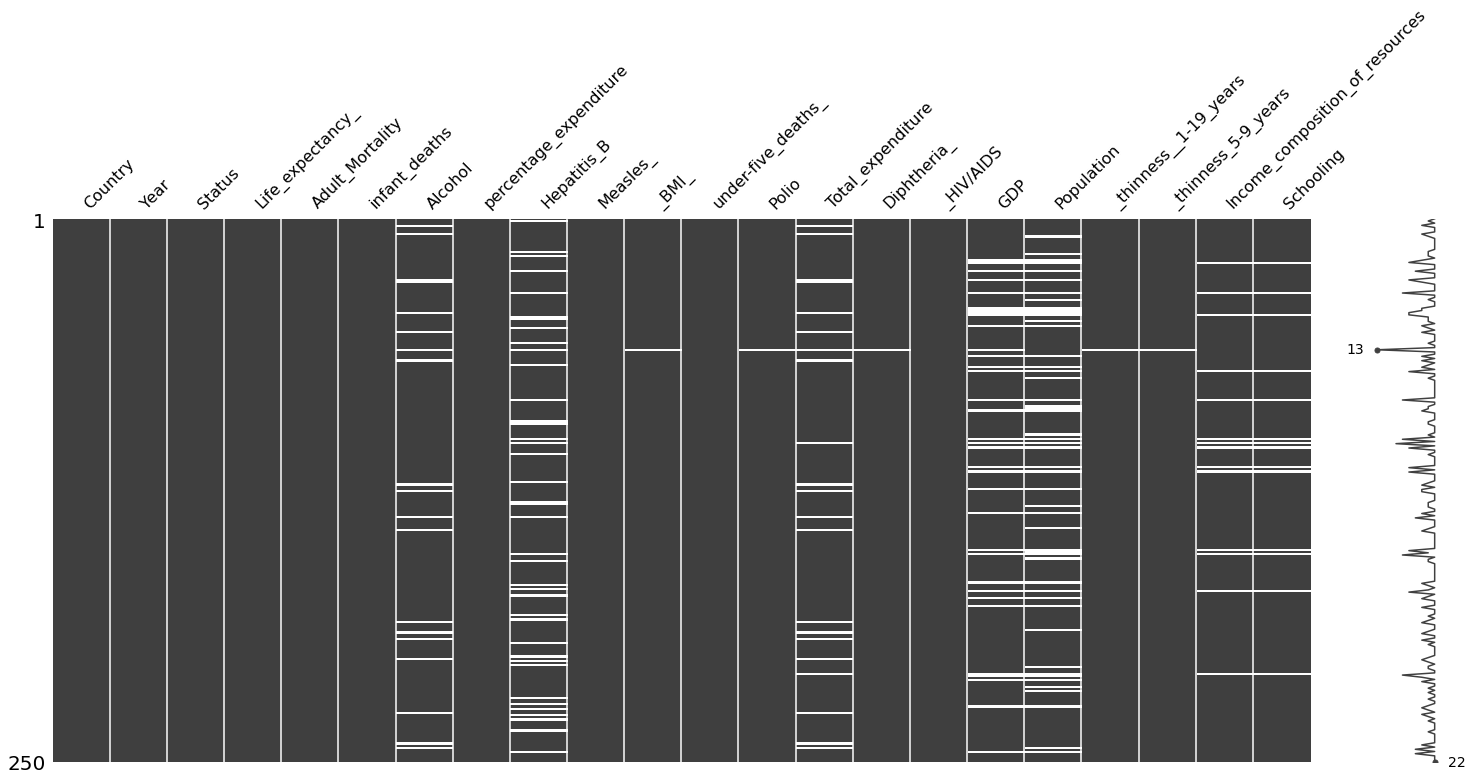

In [128]:
missingno.matrix(X_train.sample(250))

In [129]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [130]:
quantitative_imputer = IterativeImputer()
quantitative_imputer.fit_transform(X_train[quantitative])
X_train.loc[:,quantitative] = quantitative_imputer.transform(X_train.loc[:,quantitative])
X_test.loc[:, quantitative] = quantitative_imputer.transform(X_test.loc[:,quantitative])
X_train.describe()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,under-five_deaths_,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
count,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2.342000e+03,2342.000000,2342.000000,2342.00000,2342.000000
mean,2007.504697,69.396072,164.824936,28.988044,4.599444,778.860812,78.537048,2264.282237,38.084933,40.269001,82.538081,5.922080,82.402841,1.770453,6893.693109,1.189384e+07,4.805970,4.846745,0.63053,12.082273
std,4.618160,9.495626,124.984339,112.138758,3.986653,2100.304156,25.125404,10211.418797,20.004607,153.917863,23.456903,2.426599,23.664108,5.199647,13925.734401,4.945024e+07,4.302561,4.391833,0.20722,3.291100
min,2000.000000,41.000000,1.000000,0.000000,-3.957155,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.650000,2.000000,0.100000,-6207.923887,-5.698629e+06,0.100000,0.100000,0.00000,0.000000
25%,2003.250000,63.300000,74.000000,0.000000,1.012500,5.341229,72.000000,0.000000,19.400000,0.000000,77.000000,4.290000,78.000000,0.100000,474.892646,4.132150e+05,1.600000,1.600000,0.49700,10.100000
50%,2008.000000,72.200000,142.000000,3.000000,3.860000,67.490314,89.000000,15.000000,43.000000,4.000000,93.000000,5.765000,93.000000,0.100000,1852.789130,3.239440e+06,3.400000,3.400000,0.67800,12.400000
75%,2011.750000,75.875000,227.000000,21.750000,7.567500,444.676125,96.000000,334.000000,56.100000,27.000000,97.000000,7.420000,97.000000,0.800000,5169.235015,8.759880e+06,7.100000,7.100000,0.77975,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,168107.000000,76.700000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.94800,20.700000


Pas de valeurs manquantes à priori pour les variables qualitatives

In [131]:
X_train.shape

(2342, 22)

In [132]:
X_train[qualitative].describe()

,Country,Status
count,2342,2342
unique,183,2
top,Madagascar,Developing
freq,16,1916


In [137]:
X_train = pd.get_dummies(X_train, columns = ["Country"])

X_test = pd.get_dummies(X_test, columns = ["Country"])

KeyError: ignored

In [162]:

for x in list(X_train.columns):

  if not x in X_test : X_test[x] = zeros(X_test.shape[0])

In [163]:
for x in list(X_test.columns):

  if not x in X_train : del X_test[x]

In [164]:
X_train['Status'] = (X_train['Status'] == 'Developing')
X_test['Status'] = (X_test['Status'] == 'Developing')

In [165]:
X_test.shape

(586, 204)

In [166]:
X_train.shape

(2342, 204)

#5. Modèle

In [138]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

In [168]:
alpha = {'alpha' : [1e-16, 0.01, 0.1, 1/2, 1, 2, 10]}

model1 = SGDRegressor()
cv1 = GridSearchCV(model1, param_grid = alpha, n_jobs = 5, cv = 5)
cv1.fit(X_train, y_train)
cv1.best_estimator_

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [169]:
pd.DataFrame(cv1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.181829,0.017751,0.029628,0.005734,1e-16,{'alpha': 1e-16},-3.223602e+44,-8.206560e+44,-2.669582e+46,-2.396220e+44,-1.165303e+49,-2.336223e+48,4.658417e+48,7
1,0.206332,0.034557,0.026313,0.005728,0.01,{'alpha': 0.01},-7.303005e+44,-3.223861e+43,-3.278149e+45,-1.252734e+44,-1.504615e+45,-1.134115e+45,1.194078e+45,1
2,0.230596,0.029020,0.026541,0.007739,0.1,{'alpha': 0.1},-1.645371e+45,-4.228401e+45,-1.258250e+45,-1.773477e+47,-4.008465e+46,-4.491287e+46,6.781640e+46,4
3,0.203461,0.034368,0.026448,0.005065,0.5,{'alpha': 0.5},-1.227564e+45,-8.872970e+38,-2.338140e+46,-2.943032e+48,-7.041645e+44,-5.936689e+47,1.174714e+48,6
4,0.184101,0.035863,0.031026,0.004052,1,{'alpha': 1},-2.222364e+46,-3.032770e+44,-9.276420e+43,-2.434548e+46,-3.655885e+42,-9.393765e+45,1.136204e+46,2
5,0.218757,0.059981,0.027263,0.007729,2,{'alpha': 2},-2.935415e+46,-7.811958e+44,-1.371422e+44,-5.134711e+46,-3.834227e+46,-2.399237e+46,2.044887e+46,3
6,0.134975,0.039612,0.011423,0.003866,10,{'alpha': 10},-8.583705e+44,-1.801424e+47,-3.927145e+43,-5.761237e+46,-2.589997e+44,-4.778229e+46,6.979334e+46,5


In [151]:
from sklearn.metrics import r2_score

In [170]:

model1 = cv1.best_estimator_

print("train")
print(r2_score(y_train, model1.predict(X_train)))
print("test")
print(r2_score(y_test, model1.predict(X_test)))

train
-1.3190580734607373e+44
test
-2.519708266143694e+44


In [171]:
!pip install tpot

     |████████████████████████████████| 92kB 4.8MB/s 
     |████████████████████████████████| 163kB 11.7MB/s 
     |████████████████████████████████| 157.5MB 70kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=c4f5f70d8eeba92f8a0857490610ec1b56915480e2be22d935f10689bb06288f
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [172]:
import tpot

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.


In [182]:
model = tpot.TPOTRegressor(generations = 3, 
                          population_size = 20, 
                          cv = 5, 
                          scoring = 'r2', 
                          verbosity = 2, 
                          n_jobs = 5,
                          periodic_checkpoint_folder = 'model.py',
                          early_stop = 3)

model.fit(X_train, y_train)



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LassoLarsCV(input_matrix, normalize=True)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=3, generations=3,
              log_file=None, max_eval_time_mins=5, max_time_mins=None,
              memory=None, mutation_rate=0.9, n_jobs=5, offspring_size=None,
              periodic_checkpoint_folder='model.py', population_size=20,
              random_state=None, scoring='r2', subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [183]:
from sklearn.linear_model import LassoLarsCV

In [189]:
model = LassoLarsCV(normalize=False)
model.fit(X_train, y_train)

LassoLarsCV(copy_X=True, cv=None, eps=2.220446049250313e-16, fit_intercept=True,
            max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=False,
            positive=False, precompute='auto', verbose=False)

# 6. Evaluation du modèle & overfitting

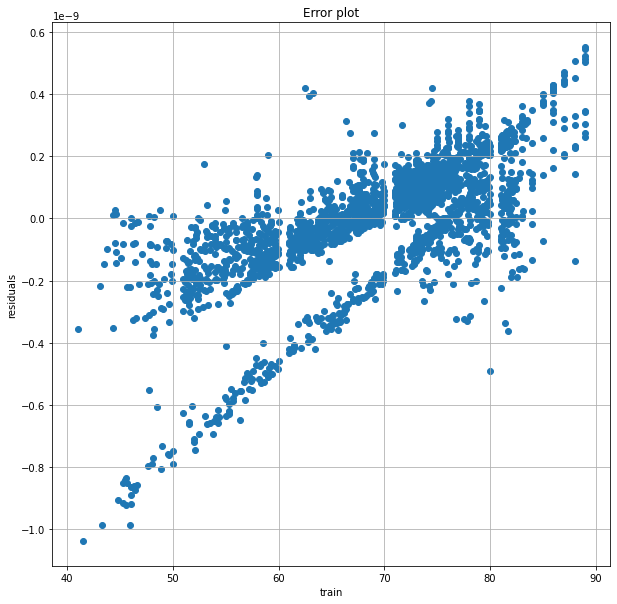

In [190]:
figure()
scatter(y_train, y_train - model.predict(X_train))
title('Error plot')
grid(True)
xlabel('train')
ylabel('residuals')
show()

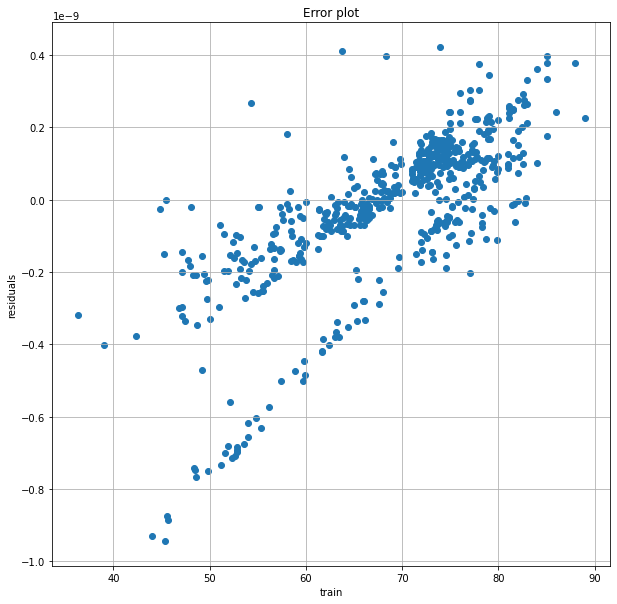

In [186]:
figure()
scatter(y_test, y_test - model.predict(X_test))
title('Error plot')
grid(True)
xlabel('train')
ylabel('residuals')
show()

Strange Residual plots. We didn't overfit anyway

In [187]:
print("train")
print(r2_score(y_train, model.predict(X_train)))
print("test")
print(r2_score(y_test, model.predict(X_test)))

train
1.0
test
1.0


In [193]:
X_train_summary = shap.kmeans(X_train, 10)

In [195]:
explainer = shap.KernelExplainer(model.predict, X_train_summary)


KeyboardInterrupt: ignored

In [196]:
shap_values = explainer.shap_values(X_train, approximate = True)
shap.summary_plot(shap_values, X_train, plot_type="bar")

KeyboardInterrupt: ignored

# 7  fast shape

In [ ]:
shap.initjs()
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

In [ ]:
shap.summary_plot(shap_values, X_test)